/var/folders/y1/pjhgyq7s17zfyt6wmlhs0jq40000gn/T/ipykernel_12054/81047193.py:6: DtypeWarning: Columns (0,1,3,5,6,7,8,11,12,13,14,17,18,19,20,28,29,31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('csv/apple_export_6MW_25.032024-03-26.csv', parse_dates=['startDate'])


the max value of 'value' is: 3000.0


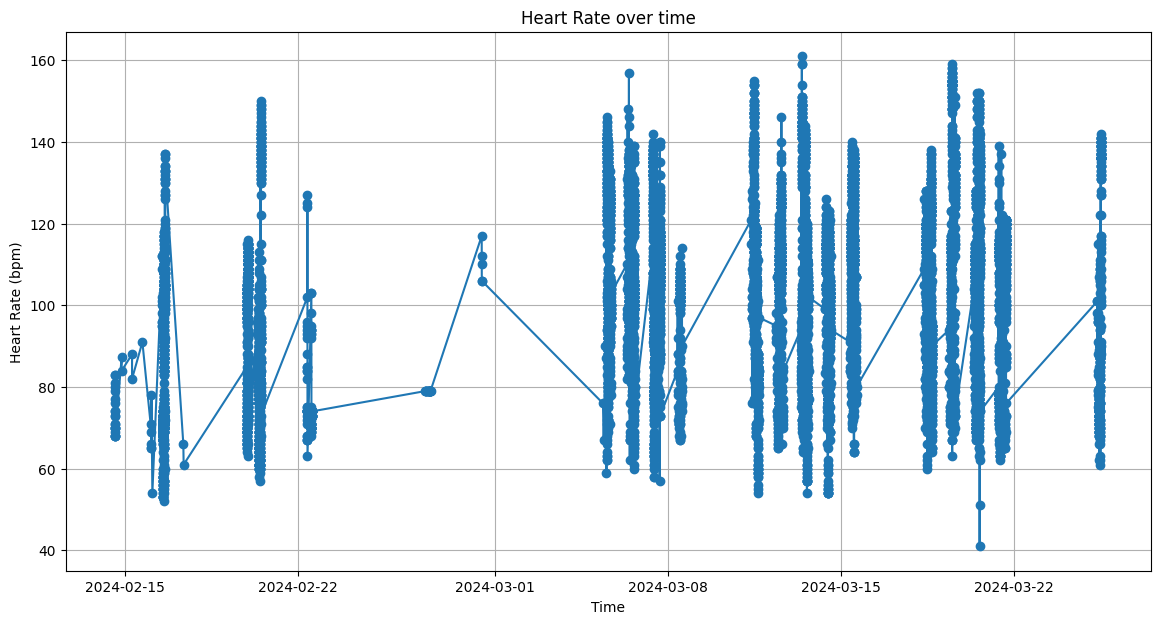

In [5]:
import matplotlib.pyplot as plt
import pandas as pd


# Assuming df is your DataFrame
df = pd.read_csv('csv/apple_export_6MW_25.032024-03-26.csv', parse_dates=['startDate'])

# Convert 'value' column to numeric, forcing non-numeric to NaN
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# Drop rows with NaN values in 'value' column to ensure equal length of data
df = df.dropna(subset=['value'])

# Filter for heart rate data
heart_rate_data = df[df['type'] == 'HeartRate']
max_value = df['value'].max()

# max value
print(f"the max value of 'value' is: {max_value}")
# Check if 'startDate' and 'value' have the same length
if len(heart_rate_data['startDate']) == len(heart_rate_data['value']):
    # Plotting the data
    plt.figure(figsize=(14, 7))
    plt.plot(heart_rate_data['startDate'], heart_rate_data['value'], marker='o')
    plt.title('Heart Rate over time')
    plt.xlabel('Time')
    plt.ylabel('Heart Rate (bpm)')
    plt.grid(True)
    plt.show()
else:
    print("Error: 'startDate' and 'value' do not have the same length.")


the max value of 'value' is:             type             sourceName  value       unit  \
37594  HeartRate  Rüdiger’s Apple Watch  161.0  count/min   

                      startDate                    endDate  \
37594 2024-03-13 09:49:09+01:00  2024-03-13 09:49:09 +0100   

                    creationDate BloodType  key  duration  ...  sum bpm  \
37594  2024-03-13 09:49:10 +0100       NaN  NaN       NaN  ...  NaN NaN   

      FitzpatrickSkinType workoutActivityType maximum  DateOfBirth  \
37594                 NaN                 NaN     NaN          NaN   

                                                  device BiologicalSex  \
37594  <<HKDevice: 0x280603840>, name:Apple Watch, ma...           NaN   

      appleExerciseTime appleStandHours  
37594               NaN             NaN  

[1 rows x 36 columns]
the min value of 'value' is:            type             sourceName  value       unit  \
8617  HeartRate  Rüdiger’s Apple Watch   41.0  count/min   

                     star

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='value'>

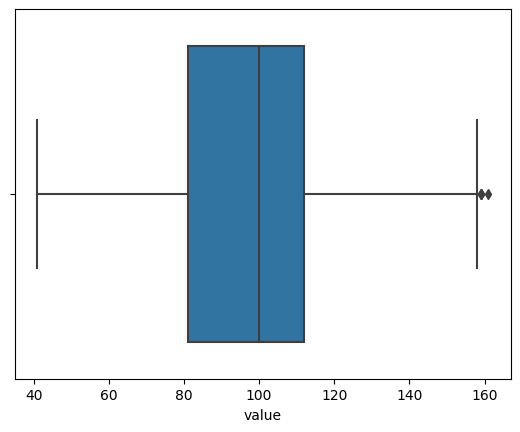

In [6]:
import seaborn as sns

df = df[df['type'] == 'HeartRate']
df_1 = df['value']
max_val = df['value'].max()
# Filtern der Zeile mit dem maximalen Wert
row_max_value = df[df['value'] == max_val]
min_val = df['value'].min()
row_min_value = df[df['value'] == min_val]


print(f"the max value of 'value' is: {row_max_value}")
print(f"the min value of 'value' is: {row_min_value}")
print(df)
print(df_1)

sns.boxplot(df.value)

            type             sourceName     value       unit  \
32505  HeartRate  Rüdiger’s Apple Watch  102.0000  count/min   
32518  HeartRate  Rüdiger’s Apple Watch   77.0000  count/min   
32520  HeartRate  Rüdiger’s Apple Watch   84.0000  count/min   
32532  HeartRate  Rüdiger’s Apple Watch   65.0000  count/min   
32567  HeartRate  Rüdiger’s Apple Watch   74.0000  count/min   
...          ...                    ...       ...        ...   
38250  HeartRate  Rüdiger’s Apple Watch   89.0000  count/min   
38254  HeartRate  Rüdiger’s Apple Watch   91.0000  count/min   
38265  HeartRate  Rüdiger’s Apple Watch   95.9649  count/min   
38272  HeartRate  Rüdiger’s Apple Watch   84.0000  count/min   
38279  HeartRate  Rüdiger’s Apple Watch   94.0000  count/min   

                      startDate                    endDate  \
32505 2024-03-13 16:31:55+01:00  2024-03-13 16:31:55 +0100   
32518 2024-03-13 16:26:03+01:00  2024-03-13 16:26:03 +0100   
32520 2024-03-13 16:25:24+01:00  2024-03-13 1

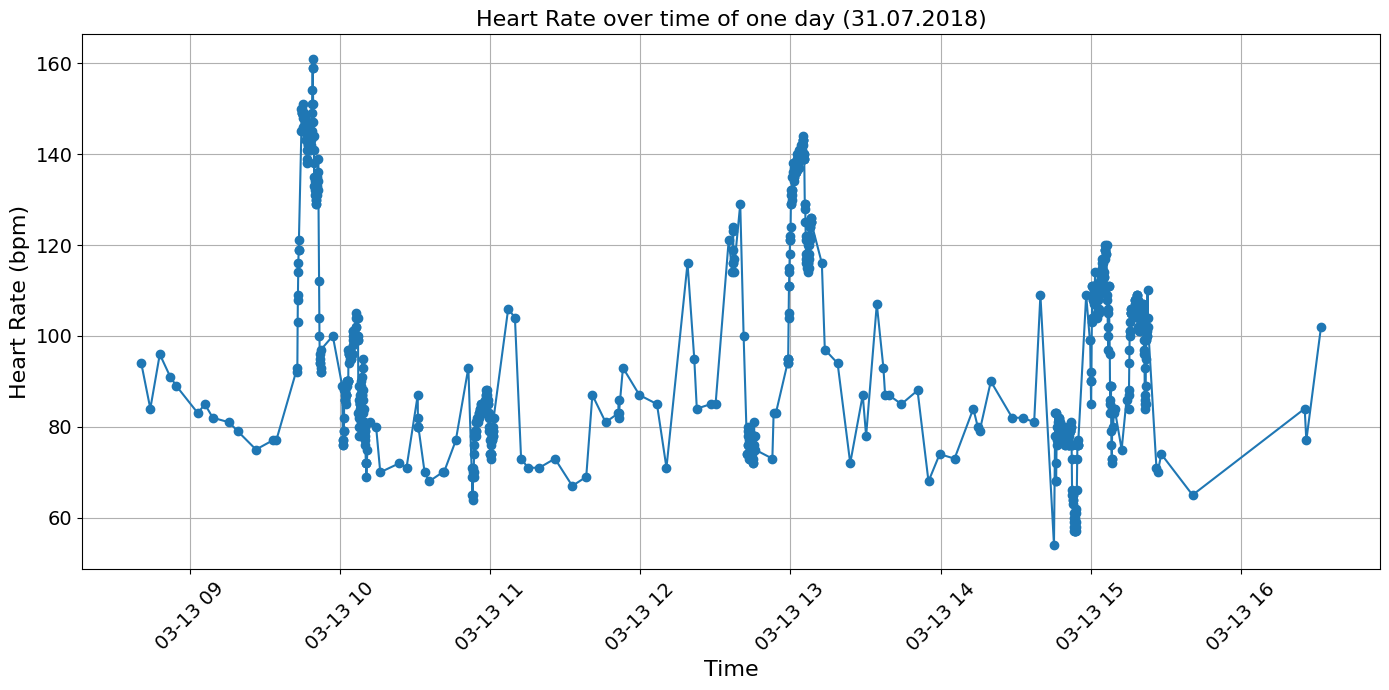

In [8]:
start_date = '2024-03-13'
end_date = '2024-03-14'
mask = (df['startDate'] >= start_date) & (df['startDate'] < end_date)
daily_data = df.loc[mask]
print(daily_data)
max_val = daily_data['value'].max()
min_val = daily_data['value'].min()

print(f"the max value of 'value' is: {max_val}")
print(f"the min value of 'value' is: {min_val}")

# Plotten der Herzfrequenz über die Zeit für den gewählten Tag
plt.figure(figsize=(14, 7))
plt.plot(daily_data['startDate'], daily_data['value'], marker='o', linestyle='-')
plt.title('Heart Rate over time of one day (31.07.2018)',fontsize=16)
plt.xlabel('Time',fontsize=16)
plt.ylabel('Heart Rate (bpm)',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True)
plt.xticks(rotation=45)  # Drehen Sie die x-Achsen-Beschriftungen, falls nötig
plt.tight_layout()  # Verbessert das Layout bei Überlappungen
plt.savefig('HeartRate1day_Prob.png')
plt.show()

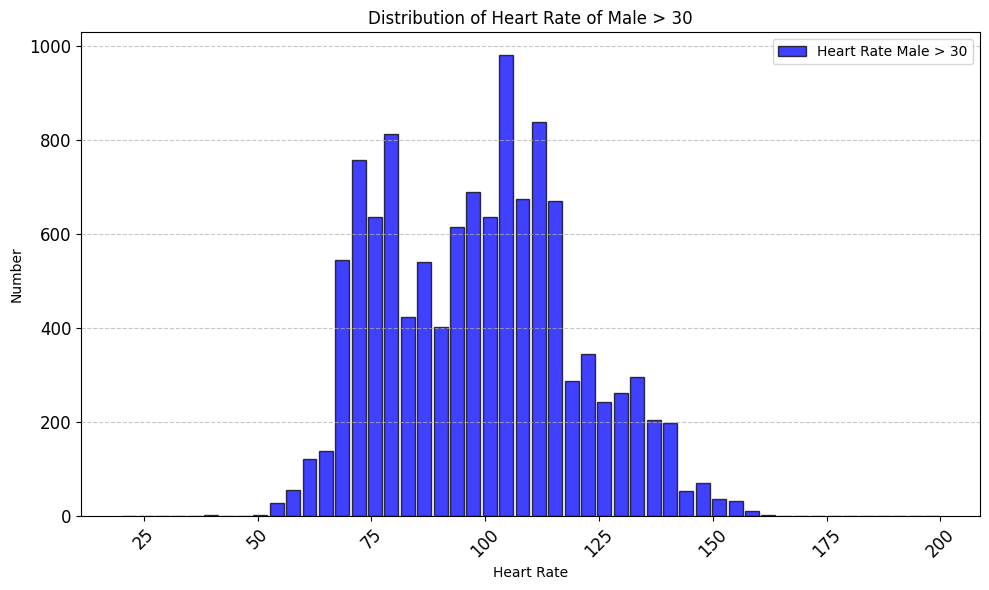

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(heart_rate_data['value'], bins=50, range=(20, 200), label='Heart Rate Male > 30', alpha=0.75, color='blue', edgecolor='black', rwidth=0.85)
plt.title('Distribution of Heart Rate of Male > 30')
plt.xlabel('Heart Rate')
plt.ylabel('Number')
plt.xticks(rotation=45)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.savefig('Dist_HeartRate_Proband.png')
plt.show()

In [10]:
df['startDate'] = pd.to_datetime(df['startDate'])
df['endDate'] = pd.to_datetime(df['endDate'])
max_date = df['startDate'].max()
min_date = df['startDate'].min()
print(max_date)
print(min_date)

2024-03-25 12:52:29+01:00
2024-02-14 14:41:03+01:00


In [20]:
import pandas as pd
import numpy as np

csv_file_path_michi = '/Users/tanjazast/Desktop/jupyter_folder/csv/apple_export_Michi2024-02-07.csv'

# CSV-Datei einlesen
df_michi = pd.read_csv(csv_file_path_michi, low_memory=False)

836.1922877178197


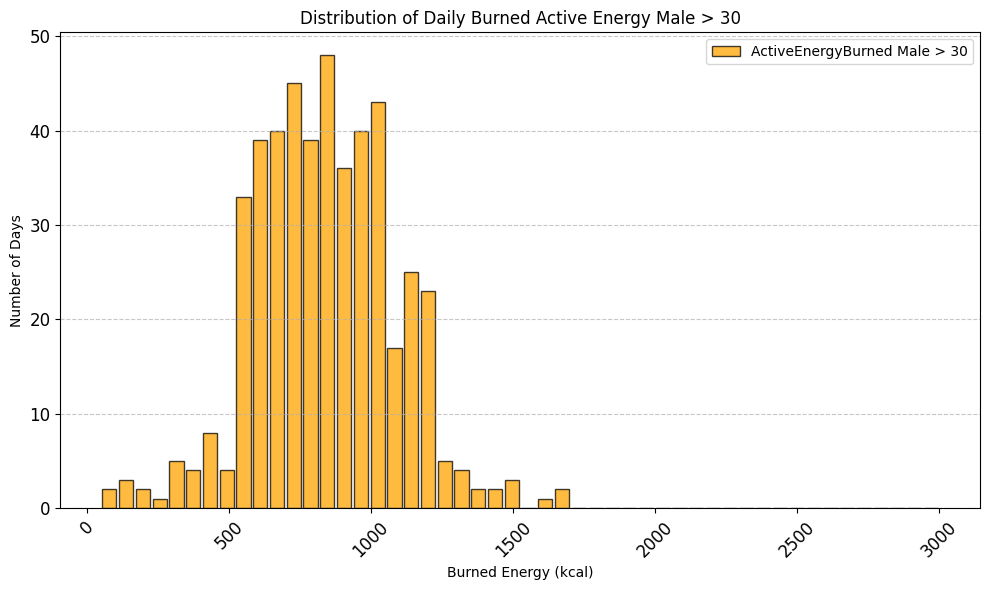

In [9]:
# Annahme, dass 'df' Ihr DataFrame ist
df_michi['startDate'] = pd.to_datetime(df_michi['startDate']).dt.date
df_michi['endDate'] = pd.to_datetime(df_michi['endDate']).dt.date

# Nur Daten für 'ActiveEnergyBurned' behalten
df_michi = df_michi[df_michi['type'] == 'ActiveEnergyBurned']

# Sicherstellen, dass 'value' als numerisch betrachtet wird
df_michi['value'] = pd.to_numeric(df_michi['value'], errors='coerce')

# Start- und Enddatum festlegen
start_date = pd.to_datetime('2022-10-17').date()
end_date = pd.to_datetime('2024-02-06').date()

# Filtern der Daten, die innerhalb des Datumsbereichs liegen
df_filtered_michi = df_michi[(df_michi['startDate'] >= start_date) & (df_michi['endDate'] <= end_date)]

# Gruppieren der Daten nach 'startDate' und Summierung der 'value'
daily_sums_michi = df_filtered_michi.groupby('startDate')['value'].sum()

print(daily_sums_michi.mean())

# Plotten der gesammelten täglichen Summen für 'ActiveEnergyBurned' als Histogramm
plt.figure(figsize=(10, 6))
plt.hist(daily_sums_michi, bins=50, range=(50, 3000), label='ActiveEnergyBurned Male > 30', alpha=0.75, color='orange', edgecolor='black', rwidth=0.85)
plt.title('Distribution of Daily Burned Active Energy Male > 30')
plt.xlabel('Burned Energy (kcal)')
plt.ylabel('Number of Days')
plt.xticks(rotation=45)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.savefig('Dist_ActiveEnergyBurned.png')
plt.show()

In [22]:
import pandas as pd
import numpy as np
csv_file_path_tanja = '/Users/tanjazast/Desktop/jupyter_folder/csv/apple_export_Tanja2024-02-06.csv'

# CSV-Datei einlesen
df_tanja = pd.read_csv(csv_file_path_tanja, low_memory=False)

1620.247790392422


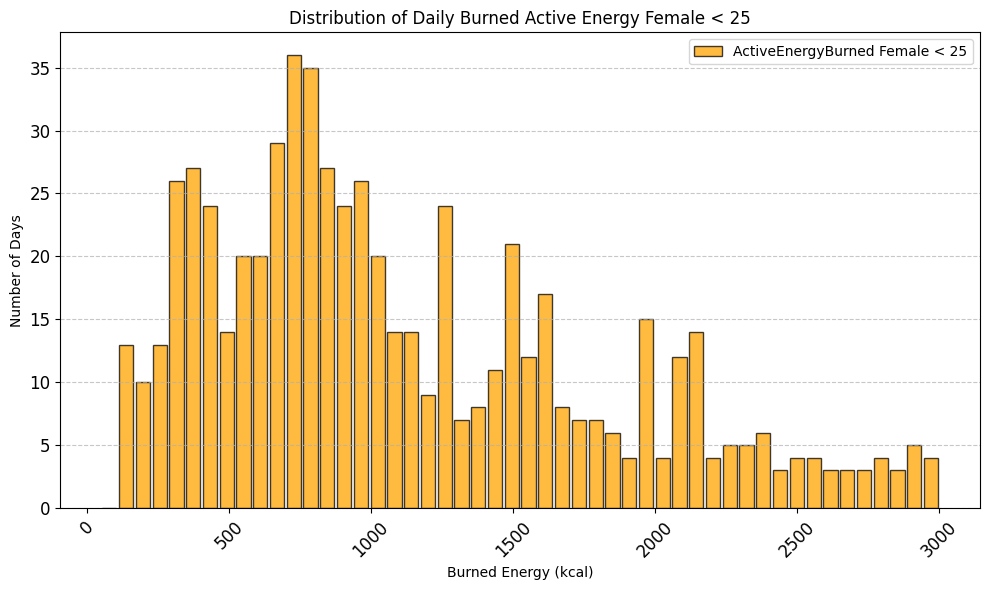

In [15]:
# Annahme, dass 'df' Ihr DataFrame ist
df_tanja['startDate'] = pd.to_datetime(df_tanja['startDate']).dt.date
df_tanja['endDate'] = pd.to_datetime(df_tanja['endDate']).dt.date

# Nur Daten für 'ActiveEnergyBurned' behalten
df_tanja = df_tanja[df_tanja['type'] == 'ActiveEnergyBurned']

# Sicherstellen, dass 'value' als numerisch betrachtet wird
df_tanja['value'] = pd.to_numeric(df_tanja['value'], errors='coerce')

# Start- und Enddatum festlegen
start_date = pd.to_datetime('2016-07-20').date()
end_date = pd.to_datetime('2019-12-24').date()

# Filtern der Daten, die innerhalb des Datumsbereichs liegen
df_filtered_tanja = df_tanja[(df_tanja['startDate'] >= start_date) & (df_tanja['endDate'] <= end_date)]

# Gruppieren der Daten nach 'startDate' und Summierung der 'value'
daily_sums_tanja = df_filtered_tanja.groupby('startDate')['value'].sum()

print(daily_sums_tanja.mean())

# Plotten der gesammelten täglichen Summen für 'ActiveEnergyBurned' als Histogramm
plt.figure(figsize=(10, 6))
plt.hist(daily_sums_tanja, bins=50, range=(50, 3000), label='ActiveEnergyBurned Female < 25', alpha=0.75, color='orange', edgecolor='black', rwidth=0.85)
plt.title('Distribution of Daily Burned Active Energy Female < 25')
plt.xlabel('Burned Energy (kcal)')
plt.ylabel('Number of Days')
plt.xticks(rotation=45)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.savefig('Dist_ActiveEnergyBurned_Tanja.png')
plt.show()

The cross entropy between the two histograms is: 3.4765683591459338


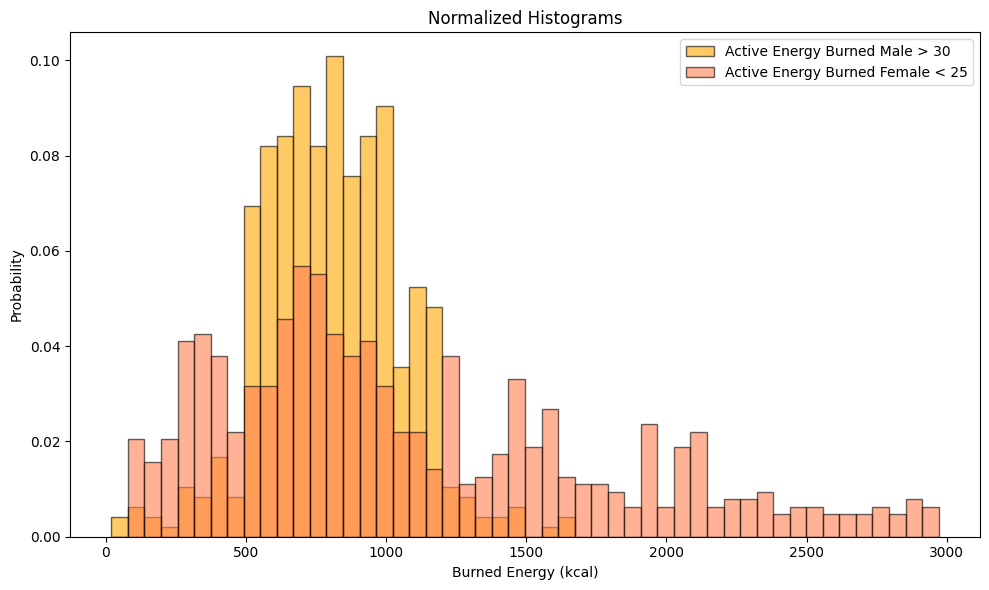

In [142]:
import numpy as np
import matplotlib.pyplot as plt

# Histogramm-Daten für beide Zeitperioden generieren
hist1, bin_edges1 = np.histogram(daily_sums_michi, bins=50, range=(50, 3000), density=True)
hist2, bin_edges2 = np.histogram(daily_sums_tanja, bins=50, range=(50, 3000), density=True)

# Sicherstellen, dass die Histogramme normalisiert sind (Summe = 1)
hist1 /= hist1.sum()
hist2 /= hist2.sum()

def cross_entropy(hist1, hist2):
    epsilon = 1e-15  # Kleiner Wert, um Logarithmus von 0 zu vermeiden
    hist1 = np.clip(hist1, epsilon, 1. - epsilon)
    hist2 = np.clip(hist2, epsilon, 1. - epsilon)
    return -np.sum(hist1 * np.log(hist2))

# Kreuzentropie berechnen
ce = cross_entropy(hist1, hist2)
print(f"The cross entropy between the two histograms is: {ce}")
orange_tones = ['#FFA500', '#FF7F50']
# Plotten der beiden Histogramme zur Visualisierung
plt.figure(figsize=(10, 6))
plt.bar(bin_edges1[:-1], hist1, width=np.diff(bin_edges1), alpha=0.6, label='Active Energy Burned Male > 30', color=orange_tones[0], edgecolor='black')
plt.bar(bin_edges2[:-1], hist2, width=np.diff(bin_edges2), alpha=0.6, label='Active Energy Burned Female < 25', color=orange_tones[1], edgecolor='black')
plt.title('Normalized Histograms')
plt.xlabel('Burned Energy (kcal)')
plt.ylabel('Probability')
plt.legend()
plt.tight_layout()
plt.savefig('CrossEntro_ActiveEnergyBurned.png')
plt.show()

2045.072719665272


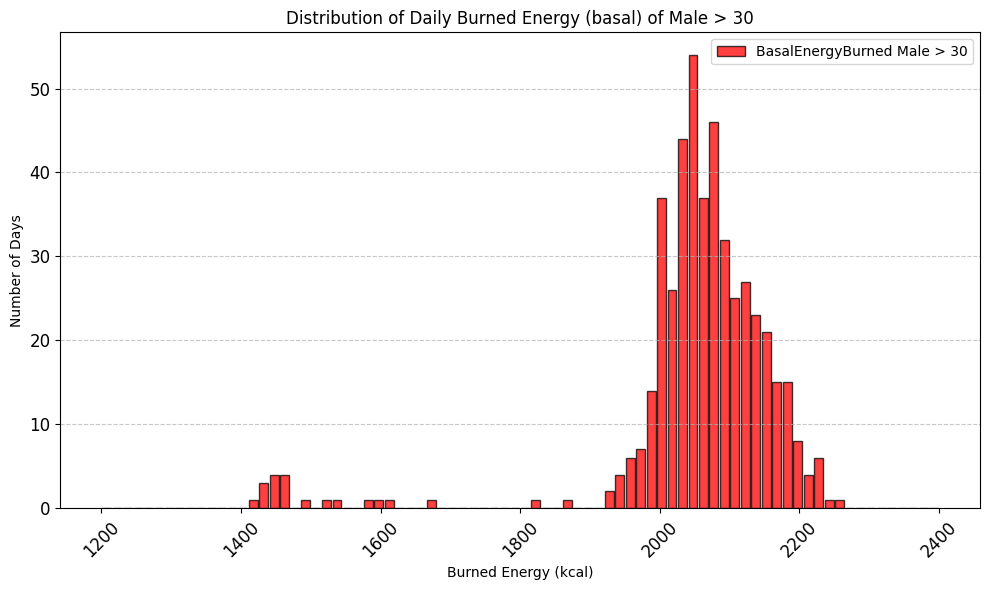

In [13]:
# Annahme, dass 'df' Ihr DataFrame ist
df_michi['startDate'] = pd.to_datetime(df_michi['startDate']).dt.date
df_michi['endDate'] = pd.to_datetime(df_michi['endDate']).dt.date

# Nur Daten für 'BasalEnergyBurned' behalten
df_michi = df_michi[df_michi['type'] == 'BasalEnergyBurned']

# Sicherstellen, dass 'value' als numerisch betrachtet wird
df_michi['value'] = pd.to_numeric(df_michi['value'], errors='coerce')

# Start- und Enddatum festlegen
start_date_michi = pd.to_datetime('2022-10-17').date()
end_date_michi = pd.to_datetime('2024-02-06').date()

# Filtern der Daten, die innerhalb des Datumsbereichs liegen
df_filtered_michi = df_michi[(df_michi['startDate'] >= start_date_michi) & (df_michi['endDate'] <= end_date_michi)]

# Gruppieren der Daten nach 'startDate' und Summierung der 'value'
daily_sums_michi = df_filtered_michi.groupby('startDate')['value'].sum()

print(daily_sums_michi.mean())

# Plotten der gesammelten täglichen Summen für 'ActiveEnergyBurned' als Histogramm
plt.figure(figsize=(10, 6))
plt.hist(daily_sums_michi, bins=80, range=(1200, 2400), label='BasalEnergyBurned Male > 30', alpha=0.75, color='red', edgecolor='black', rwidth=0.85)
plt.title('Distribution of Daily Burned Energy (basal) of Male > 30')
plt.xlabel('Burned Energy (kcal)')
plt.ylabel('Number of Days')
plt.xticks(rotation=45)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.savefig('Dist_BasalEnergyBurned.png')
plt.show()

1362.89098917456


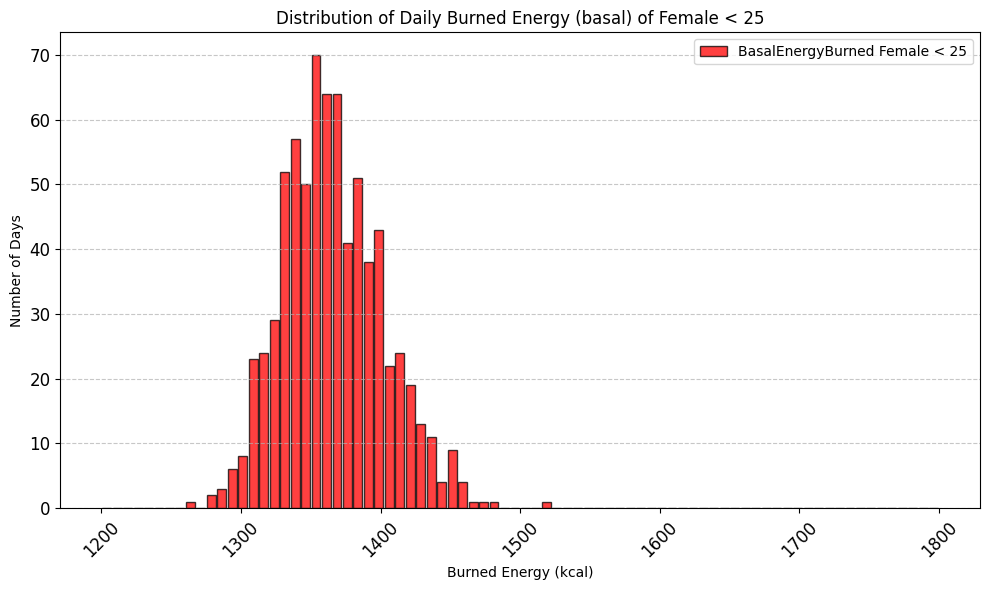

In [18]:
# Annahme, dass 'df' Ihr DataFrame ist
df_tanja['startDate'] = pd.to_datetime(df_tanja['startDate']).dt.date
df_tanja['endDate'] = pd.to_datetime(df_tanja['endDate']).dt.date

# Nur Daten für 'BasalEnergyBurned' behalten
df_tanja = df_tanja[df_tanja['type'] == 'BasalEnergyBurned']

# Sicherstellen, dass 'value' als numerisch betrachtet wird
df_tanja['value'] = pd.to_numeric(df_tanja['value'], errors='coerce')

# Start- und Enddatum festlegen
start_date_tanja = pd.to_datetime('2016-07-20').date()
end_date_tanja = pd.to_datetime('2019-12-24').date()

# Filtern der Daten, die innerhalb des Datumsbereichs liegen
df_filtered_tanja = df_tanja[(df_tanja['startDate'] >= start_date_tanja) & (df_tanja['endDate'] <= end_date_tanja)]

# Gruppieren der Daten nach 'startDate' und Summierung der 'value'
daily_sums_tanja = df_filtered_tanja.groupby('startDate')['value'].sum()

print(daily_sums_tanja.mean())

# Plotten der gesammelten täglichen Summen für 'ActiveEnergyBurned' als Histogramm
plt.figure(figsize=(10, 6))
plt.hist(daily_sums_tanja, bins=80, range=(1200, 1800), label='BasalEnergyBurned Female < 25', alpha=0.75, color='red', edgecolor='black', rwidth=0.85)
plt.title('Distribution of Daily Burned Energy (basal) of Female < 25')
plt.xlabel('Burned Energy (kcal)')
plt.ylabel('Number of Days')
plt.xticks(rotation=45)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.savefig('Dist_BasalEnergyBurned_Tanja.png')
plt.show()

The cross entropy between the two histograms is: 33.703836799843415


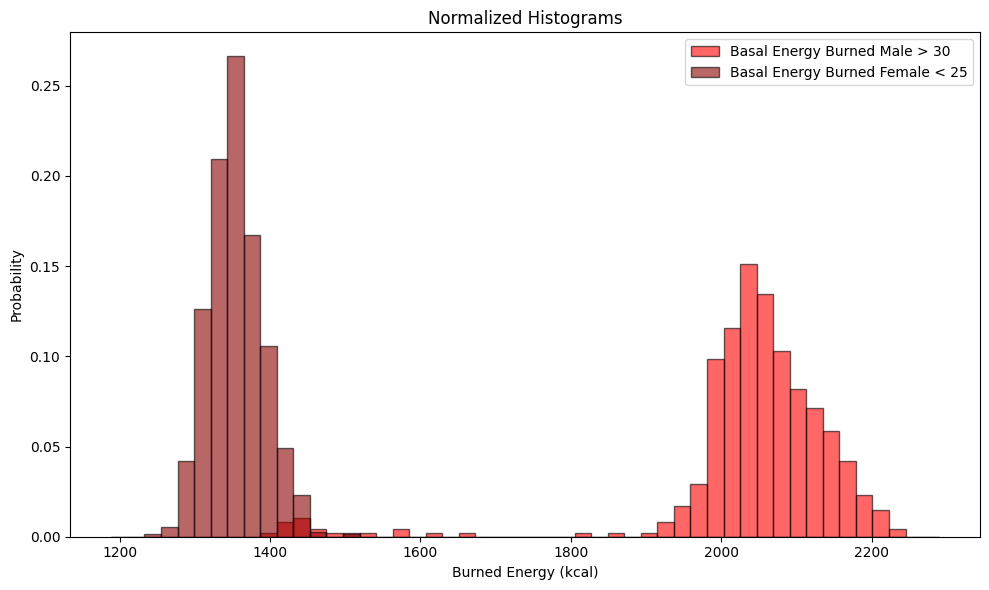

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Histogramm-Daten für beide Zeitperioden generieren
hist1, bin_edges1 = np.histogram(daily_sums_michi, bins=50, range=(1200, 2300), density=True)
hist2, bin_edges2 = np.histogram(daily_sums_tanja, bins=50, range=(1200, 2300), density=True)

# Sicherstellen, dass die Histogramme normalisiert sind (Summe = 1)
hist1 /= hist1.sum()
hist2 /= hist2.sum()

def cross_entropy(hist1, hist2):
    epsilon = 1e-15  # Kleiner Wert, um Logarithmus von 0 zu vermeiden
    hist1 = np.clip(hist1, epsilon, 1. - epsilon)
    hist2 = np.clip(hist2, epsilon, 1. - epsilon)
    return -np.sum(hist1 * np.log(hist2))

# Kreuzentropie berechnen
ce = cross_entropy(hist1, hist2)
print(f"The cross entropy between the two histograms is: {ce}")
red_tones = ['#FF0000', '#8B0000']
# Plotten der beiden Histogramme zur Visualisierung
plt.figure(figsize=(10, 6))
plt.bar(bin_edges1[:-1], hist1, width=np.diff(bin_edges1), alpha=0.6, label='Basal Energy Burned Male > 30', color=red_tones[0], edgecolor='black')
plt.bar(bin_edges2[:-1], hist2, width=np.diff(bin_edges2), alpha=0.6, label='Basal Energy Burned Female < 25', color=red_tones[1], edgecolor='black')
plt.title('Normalized Histograms')
plt.xlabel('Burned Energy (kcal)')
plt.ylabel('Probability')
plt.legend()
plt.tight_layout()
plt.savefig('CrossEntro_BasalEnergyBurned.png')
plt.show()

76.8927485914056
9          73.0000
10         73.0000
11         73.0000
12         73.0000
13         73.0000
            ...   
1418275    67.0000
1418276    66.0000
1418282    71.0000
1418289    68.0000
1418290    68.6894
Name: value, Length: 216998, dtype: float64


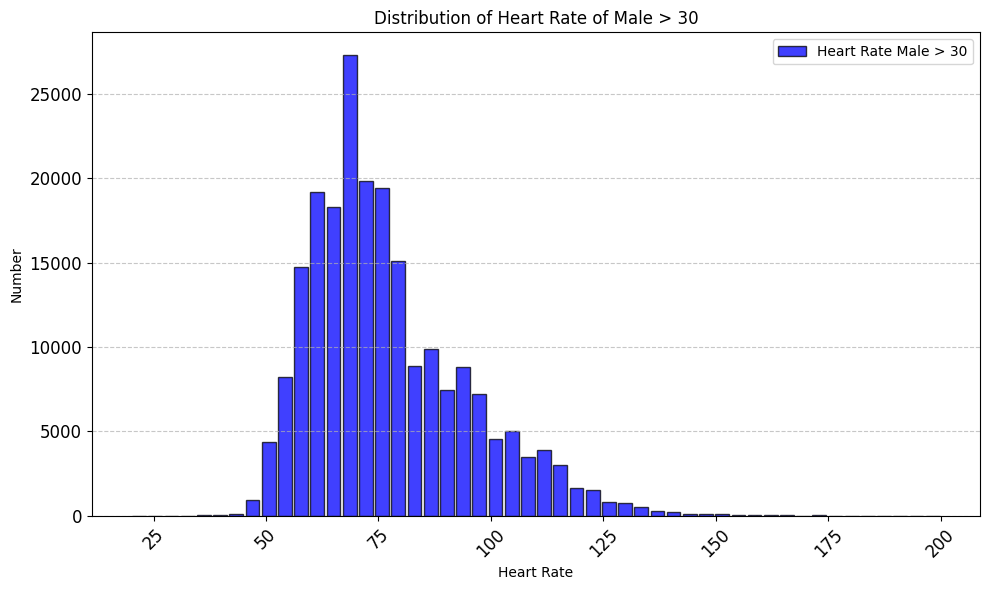

In [6]:
import matplotlib.pyplot as plt

# Annahme, dass 'df' Ihr DataFrame ist
df_michi['startDate'] = pd.to_datetime(df_michi['startDate']).dt.date
df_michi['endDate'] = pd.to_datetime(df_michi['endDate']).dt.date

# Nur Daten für 'BasalEnergyBurned' behalten
df_michi = df_michi[df_michi['type'] == 'HeartRate']

# Sicherstellen, dass 'value' als numerisch betrachtet wird
df_michi['value'] = pd.to_numeric(df_michi['value'], errors='coerce')

# Start- und Enddatum festlegen
start_date_michi = pd.to_datetime('2022-10-17').date()
end_date_michi = pd.to_datetime('2024-02-06').date()
mean = df_michi['value'].mean()
print(mean)

print(df_michi['value'])
plt.figure(figsize=(10, 6))
plt.hist(df_michi['value'], bins=50, range=(20, 200), label='Heart Rate Male > 30', alpha=0.75, color='blue', edgecolor='black', rwidth=0.85)
plt.title('Distribution of Heart Rate of Male > 30')
plt.xlabel('Heart Rate')
plt.ylabel('Number')
plt.xticks(rotation=45)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.savefig('Dist_HeartRate_Proband.png')
plt.show()

99.89144564230399
42784      54.0
42785      55.0
42786      54.0
42787      51.0
42788      53.0
           ... 
5477117    84.0
5477146    61.0
5477152    59.0
5477158    72.0
5477165    63.0
Name: value, Length: 1089165, dtype: float64


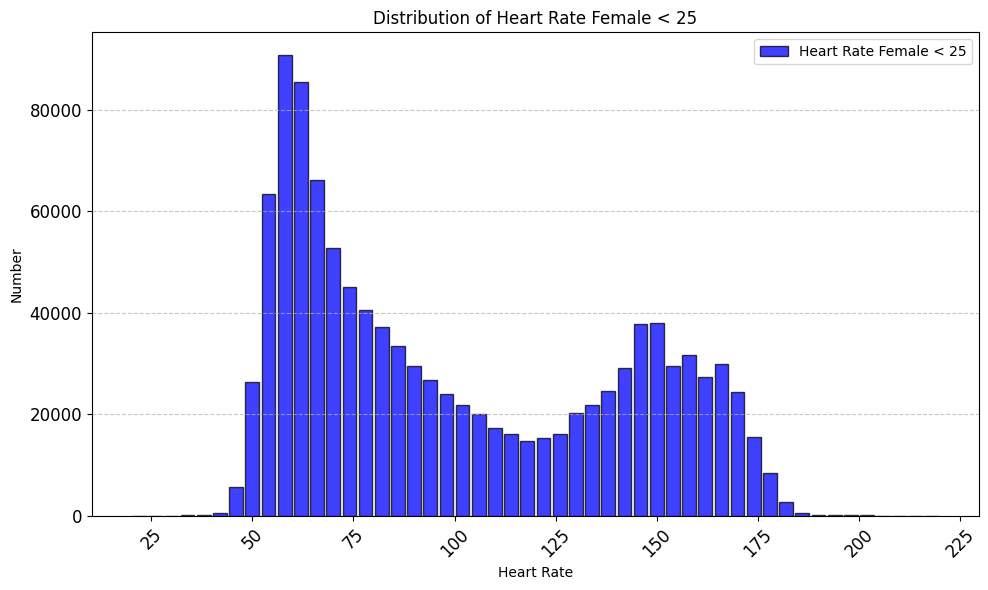

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# Annahme, dass 'df' Ihr DataFrame ist
df_tanja['startDate'] = pd.to_datetime(df_tanja['startDate']).dt.date
df_tanja['endDate'] = pd.to_datetime(df_tanja['endDate']).dt.date

# Nur Daten für 'BasalEnergyBurned' behalten
df_tanja = df_tanja[df_tanja['type'] == 'HeartRate']

# Sicherstellen, dass 'value' als numerisch betrachtet wird
df_tanja['value'] = pd.to_numeric(df_tanja['value'], errors='coerce')

# Start- und Enddatum festlegen
start_date_tanja = pd.to_datetime('2016-07-20').date()
end_date_tanja = pd.to_datetime('2019-12-24').date()
mean = df_tanja['value'].mean()
print(mean)

print(df_tanja['value'])
plt.figure(figsize=(10, 6))
plt.hist(df_tanja['value'], bins=50, range=(20, 220), label='Heart Rate Female < 25', alpha=0.75, color='blue', edgecolor='black', rwidth=0.85)
plt.title('Distribution of Heart Rate Female < 25')
plt.xlabel('Heart Rate')
plt.ylabel('Number')
plt.xticks(rotation=45)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.savefig('Dist_HeartRate_Tanja.png')
plt.show()

The cross entropy between the two histograms is: 3.570002166756625


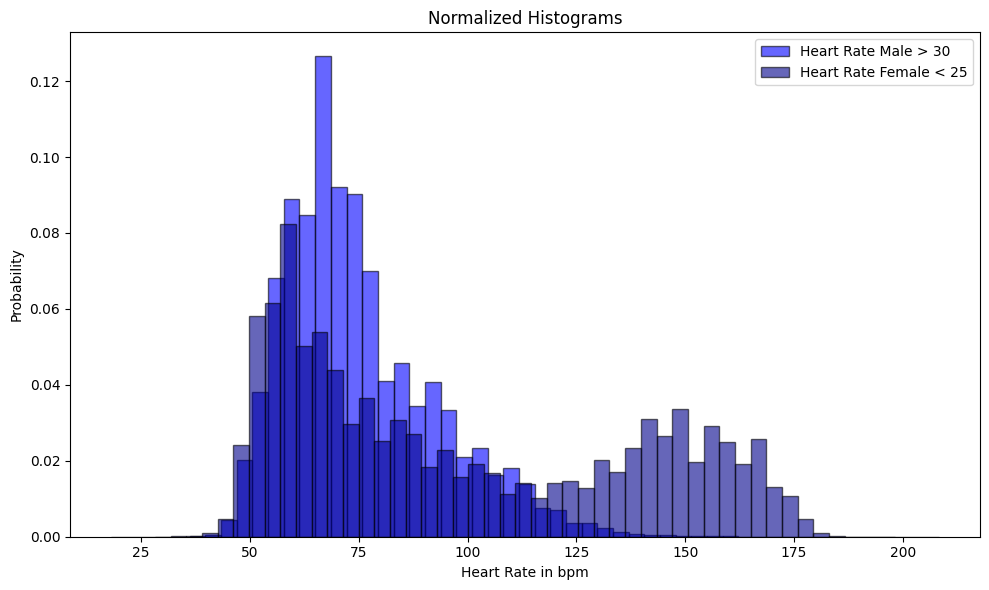

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Histogramm-Daten für beide Zeitperioden generieren
hist1, bin_edges1 = np.histogram(df_michi['value'], bins=50, range=(20, 200), density=True)
hist2, bin_edges2 = np.histogram(df_tanja['value'], bins=50, range=(30, 210), density=True)

# Sicherstellen, dass die Histogramme normalisiert sind (Summe = 1)
hist1 /= hist1.sum()
hist2 /= hist2.sum()

def cross_entropy(hist1, hist2):
    epsilon = 1e-15  # Kleiner Wert, um Logarithmus von 0 zu vermeiden
    hist1 = np.clip(hist1, epsilon, 1. - epsilon)
    hist2 = np.clip(hist2, epsilon, 1. - epsilon)
    return -np.sum(hist1 * np.log(hist2))

# Kreuzentropie berechnen
ce = cross_entropy(hist1, hist2)
print(f"The cross entropy between the two histograms is: {ce}")
blue_tones = ['#0000FF', '#00008B']
# Plotten der beiden Histogramme zur Visualisierung
plt.figure(figsize=(10, 6))
plt.bar(bin_edges1[:-1], hist1, width=np.diff(bin_edges1), alpha=0.6, label='Heart Rate Male > 30', color=blue_tones[0], edgecolor='black')
plt.bar(bin_edges2[:-1], hist2, width=np.diff(bin_edges2), alpha=0.6, label='Heart Rate Female < 25', color=blue_tones[1], edgecolor='black')
plt.title('Normalized Histograms')
plt.xlabel('Heart Rate in bpm')
plt.ylabel('Probability')
plt.legend()
plt.tight_layout()
plt.savefig('CrossEntro_HeartRate.png')
plt.show()

15.667448825589338


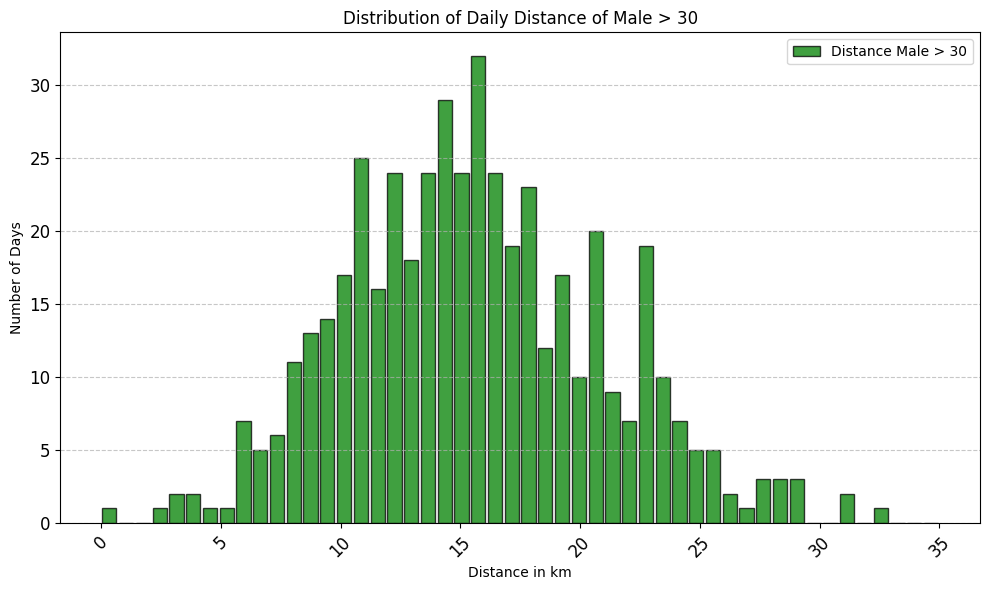

In [21]:
# Annahme, dass 'df' Ihr DataFrame ist
df_michi['startDate'] = pd.to_datetime(df_michi['startDate']).dt.date
df_michi['endDate'] = pd.to_datetime(df_michi['endDate']).dt.date

df_michi = df_michi[df_michi['type'] == 'DistanceWalkingRunning']

# Sicherstellen, dass 'value' als numerisch betrachtet wird
df_michi['value'] = pd.to_numeric(df_michi['value'], errors='coerce')

# Start- und Enddatum festlegen
start_date_michi = pd.to_datetime('2022-10-17').date()
end_date_michi = pd.to_datetime('2024-02-06').date()

# Filtern der Daten, die innerhalb des Datumsbereichs liegen
df_filtered_michi = df_michi[(df_michi['startDate'] >= start_date_michi) & (df_michi['endDate'] <= end_date_michi)]

# Gruppieren der Daten nach 'startDate' und Summierung der 'value'
daily_sums_michi = df_filtered_michi.groupby('startDate')['value'].sum()

print(daily_sums_michi.mean())

# Plotten der gesammelten täglichen Summen für 'ActiveEnergyBurned' als Histogramm
plt.figure(figsize=(10, 6))
plt.hist(daily_sums_michi, bins=50, range=(0, 35), label='Distance Male > 30', alpha=0.75, color='green', edgecolor='black', rwidth=0.85)
plt.title('Distribution of Daily Distance of Male > 30')
plt.xlabel('Distance in km')
plt.ylabel('Number of Days')
plt.xticks(rotation=45)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.savefig('Dist_DailyDistance.png')
plt.show()

18.543102947298337


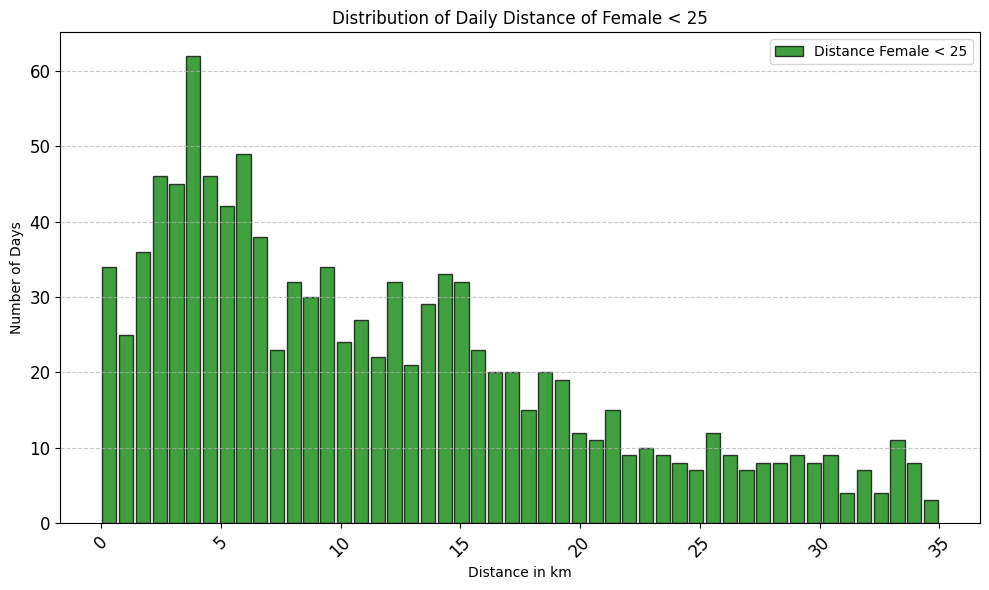

In [23]:
# Annahme, dass 'df' Ihr DataFrame ist
df_tanja['startDate'] = pd.to_datetime(df_tanja['startDate']).dt.date
df_tanja['endDate'] = pd.to_datetime(df_tanja['endDate']).dt.date

df_tanja = df_tanja[df_tanja['type'] == 'DistanceWalkingRunning']

# Sicherstellen, dass 'value' als numerisch betrachtet wird
df_tanja['value'] = pd.to_numeric(df_tanja['value'], errors='coerce')

# Start- und Enddatum festlegen
start_date_tanja = pd.to_datetime('2016-07-20').date()
end_date_tanja = pd.to_datetime('2019-12-24').date()

# Filtern der Daten, die innerhalb des Datumsbereichs liegen
df_filtered_tanja = df_tanja[(df_tanja['startDate'] >= start_date_tanja) & (df_tanja['endDate'] <= end_date_tanja)]

# Gruppieren der Daten nach 'startDate' und Summierung der 'value'
daily_sums_tanja = df_filtered_tanja.groupby('startDate')['value'].sum()

print(daily_sums_tanja.mean())

# Plotten der gesammelten täglichen Summen für 'ActiveEnergyBurned' als Histogramm
plt.figure(figsize=(10, 6))
plt.hist(daily_sums_tanja, bins=50, range=(0, 35), label='Distance Female < 25', alpha=0.75, color='green', edgecolor='black', rwidth=0.85)
plt.title('Distribution of Daily Distance of Female < 25')
plt.xlabel('Distance in km')
plt.ylabel('Number of Days')
plt.xticks(rotation=45)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.savefig('Dist_DailyDistance_Tanja.png')
plt.show()

The cross entropy between the two histograms is: 3.945256522321175


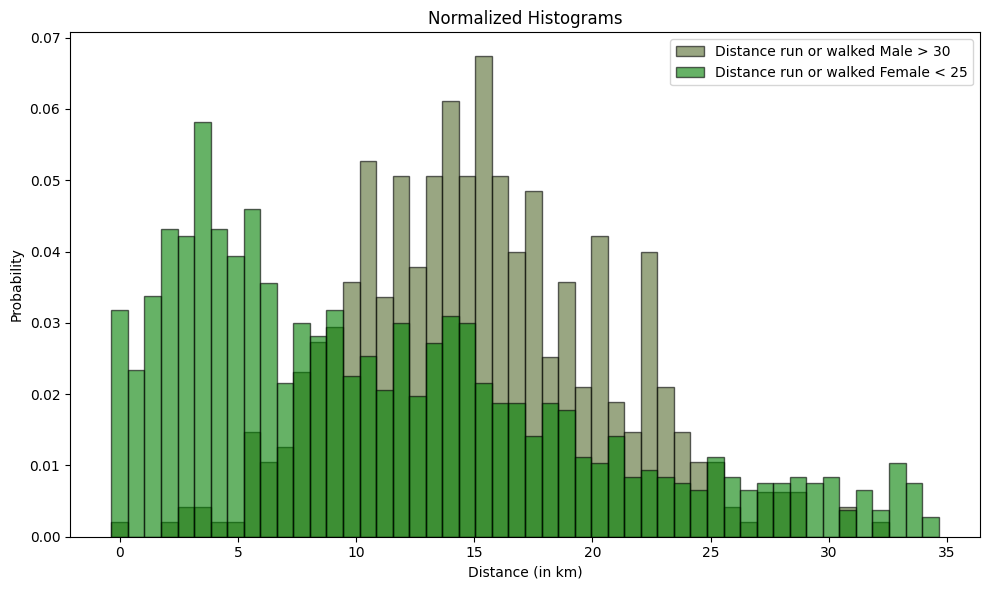

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Histogramm-Daten für beide Zeitperioden generieren
hist1, bin_edges1 = np.histogram(daily_sums_michi, bins=50, range=(0, 35), density=True)
hist2, bin_edges2 = np.histogram(daily_sums_tanja, bins=50, range=(0, 35), density=True)

# Sicherstellen, dass die Histogramme normalisiert sind (Summe = 1)
hist1 /= hist1.sum()
hist2 /= hist2.sum()

def cross_entropy(hist1, hist2):
    epsilon = 1e-15  # Kleiner Wert, um Logarithmus von 0 zu vermeiden
    hist1 = np.clip(hist1, epsilon, 1. - epsilon)
    hist2 = np.clip(hist2, epsilon, 1. - epsilon)
    return -np.sum(hist1 * np.log(hist2))

# Kreuzentropie berechnen
ce = cross_entropy(hist1, hist2)
print(f"The cross entropy between the two histograms is: {ce}")
green_tones = ['#556B2F', '#008000']
# Plotten der beiden Histogramme zur Visualisierung
plt.figure(figsize=(10, 6))
plt.bar(bin_edges1[:-1], hist1, width=np.diff(bin_edges1), alpha=0.6, label='Distance run or walked Male > 30', color=green_tones[0], edgecolor='black')
plt.bar(bin_edges2[:-1], hist2, width=np.diff(bin_edges2), alpha=0.6, label='Distance run or walked Female < 25', color=green_tones[1], edgecolor='black')
plt.title('Normalized Histograms')
plt.xlabel('Distance (in km)')
plt.ylabel('Probability')
plt.legend()
plt.tight_layout()
plt.savefig('CrossEntro_Distance.png')
plt.show()

In [6]:
# Filtern nach aktiver Energie
df_energy = pd.read_csv('apple_export_Tanja2024-02-06.csv', parse_dates=['startDate'])

# Convert 'value' column to numeric, forcing non-numeric to NaN
#df_energy['value'] = pd.to_numeric(df_energy['value'], errors='coerce')

# Drop rows with NaN values in 'value' column to ensure equal length of data

# Filter for heart rate data
heart_rate_data = df[df['type'] == 'HeartRate']
active_energy_data = df_energy[df_energy['type'] == 'ActiveEnergyBurned']

/var/folders/y1/pjhgyq7s17zfyt6wmlhs0jq40000gn/T/ipykernel_30288/1309637313.py:2: DtypeWarning: Columns (0,1,2,3,5,6,7,10,11,13,14,16,17,19,20,21,25,27,28,29,30,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df_energy = pd.read_csv('apple_export_Tanja2024-02-06.csv', parse_dates=['startDate'])


the active energy data is:                        type             sourceName   value  unit  \
1        ActiveEnergyBurned            Tanjalein 🦄   0.515  kcal   
19       ActiveEnergyBurned            Tanjalein 🦄   0.714  kcal   
44       ActiveEnergyBurned            Tanjalein 🦄   5.804  kcal   
62       ActiveEnergyBurned            Tanjalein 🦄   5.844  kcal   
77       ActiveEnergyBurned            Tanjalein 🦄  19.315  kcal   
...                     ...                    ...     ...   ...   
5477164  ActiveEnergyBurned  Apple Watch von Tanja   0.178  kcal   
5477168  ActiveEnergyBurned  Apple Watch von Tanja   0.076  kcal   
5477169  ActiveEnergyBurned  Apple Watch von Tanja   0.148  kcal   
5477171  ActiveEnergyBurned  Apple Watch von Tanja   0.124  kcal   
5477188  ActiveEnergyBurned  Apple Watch von Tanja   0.023  kcal   

                        startDate                    endDate  \
1       2024-01-26 09:46:34+01:00  2024-01-26 09:53:24 +0100   
19      2024-01-26 01:29:45+

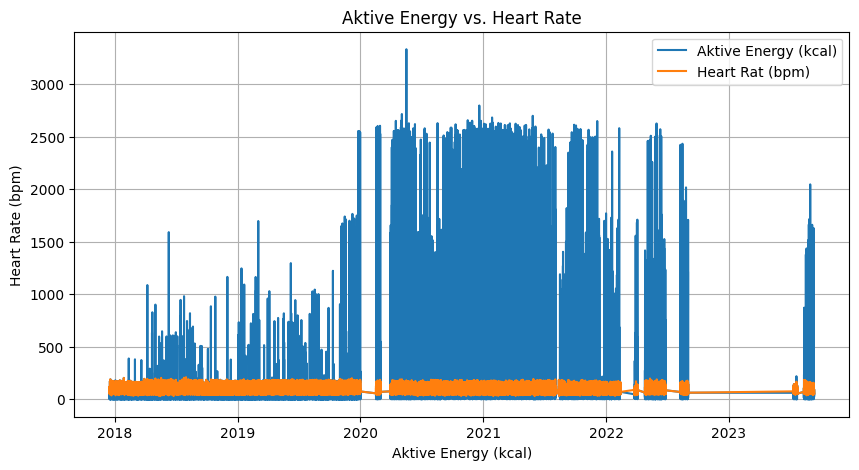

In [7]:
# Convert 'value' column to numeric, forcing non-numeric to NaN
df_energy['value'] = pd.to_numeric(df_energy['value'], errors='coerce')

# Drop rows with NaN values in 'value' column to ensure equal length of data
df_energy = df_energy.dropna(subset=['value'])

print(f"the active energy data is: {active_energy_data}")
print(f"the heart rate data is: {heart_rate_data}")


# Merge the two dataframes on the date column
merged_df = pd.merge(df_energy, df, on='startDate', suffixes=('_energy', '_heart_rate'))

# Now plot
plt.figure(figsize=(10, 5))
plt.plot(merged_df['startDate'], merged_df['value_energy'], label='Aktive Energy (kcal)')
plt.plot(merged_df['startDate'], merged_df['value_heart_rate'], label='Heart Rat (bpm)')
plt.title('Aktive Energy vs. Heart Rate')
plt.xlabel('Aktive Energy (kcal)')
plt.ylabel('Heart Rate (bpm)')
plt.legend()
plt.grid(True)
plt.show()

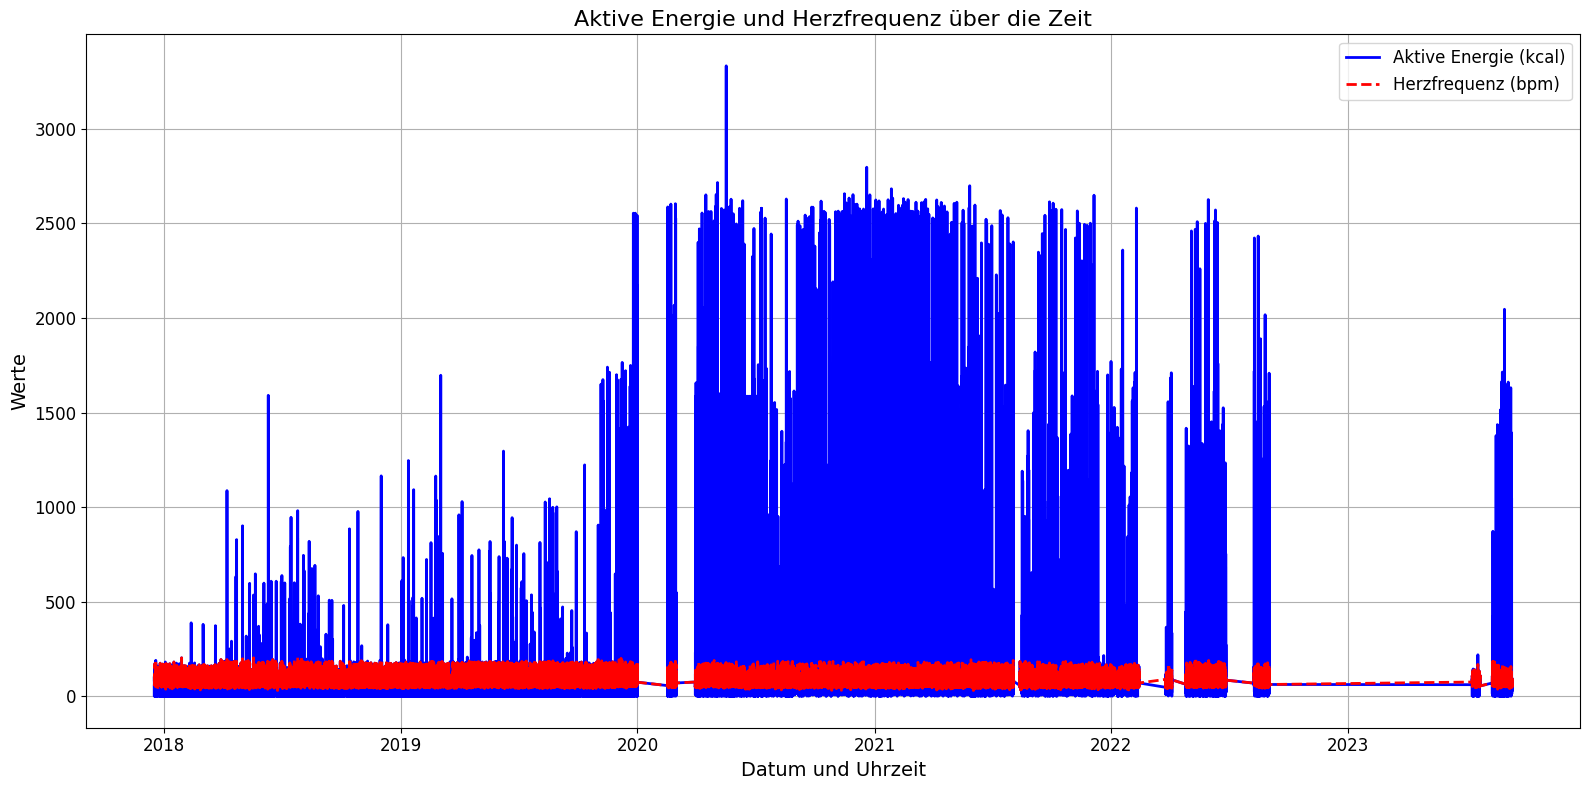

In [8]:
plt.figure(figsize=(16, 8))  # Größeres Bildformat
plt.plot(merged_df['startDate'], merged_df['value_energy'], label='Aktive Energie (kcal)', color='blue', linestyle='-', linewidth=2)
plt.plot(merged_df['startDate'], merged_df['value_heart_rate'], label='Herzfrequenz (bpm)', color='red', linestyle='--', linewidth=2)
plt.title('Aktive Energie und Herzfrequenz über die Zeit', fontsize=16)  # Größere Schrift für den Titel
plt.xlabel('Datum und Uhrzeit', fontsize=14)  # Größere Schrift für die x-Achsenbeschriftung
plt.ylabel('Werte', fontsize=14)  # Größere Schrift für die y-Achsenbeschriftung
plt.legend(fontsize=12)  # Größere Schrift für die Legende
plt.grid(True)
plt.xticks(fontsize=12)  # Größere Schrift für die x-Achsenbeschriftungen
plt.yticks(fontsize=12)  # Größere Schrift für die y-Achsenbeschriftungen
plt.tight_layout()  # Verbessert das Layout
plt.show()

                    type_energy      sourceName_energy  value_energy  \
653053                HeartRate  Apple Watch von Tanja          57.0   
653054                HeartRate  Apple Watch von Tanja          58.0   
653055                HeartRate  Apple Watch von Tanja          63.0   
653056                HeartRate  Apple Watch von Tanja          59.0   
653057                HeartRate  Apple Watch von Tanja          58.0   
...                         ...                    ...           ...   
728532                HeartRate  Apple Watch von Tanja          62.0   
728533                HeartRate  Apple Watch von Tanja          63.0   
728534                HeartRate  Apple Watch von Tanja          61.0   
728535  WalkingHeartRateAverage  Apple Watch von Tanja         117.0   
728536         RestingHeartRate  Apple Watch von Tanja          51.0   

       unit_energy                 startDate             endDate_energy  \
653053   count/min 2019-11-14 23:52:10+01:00  2019-11-14 23:

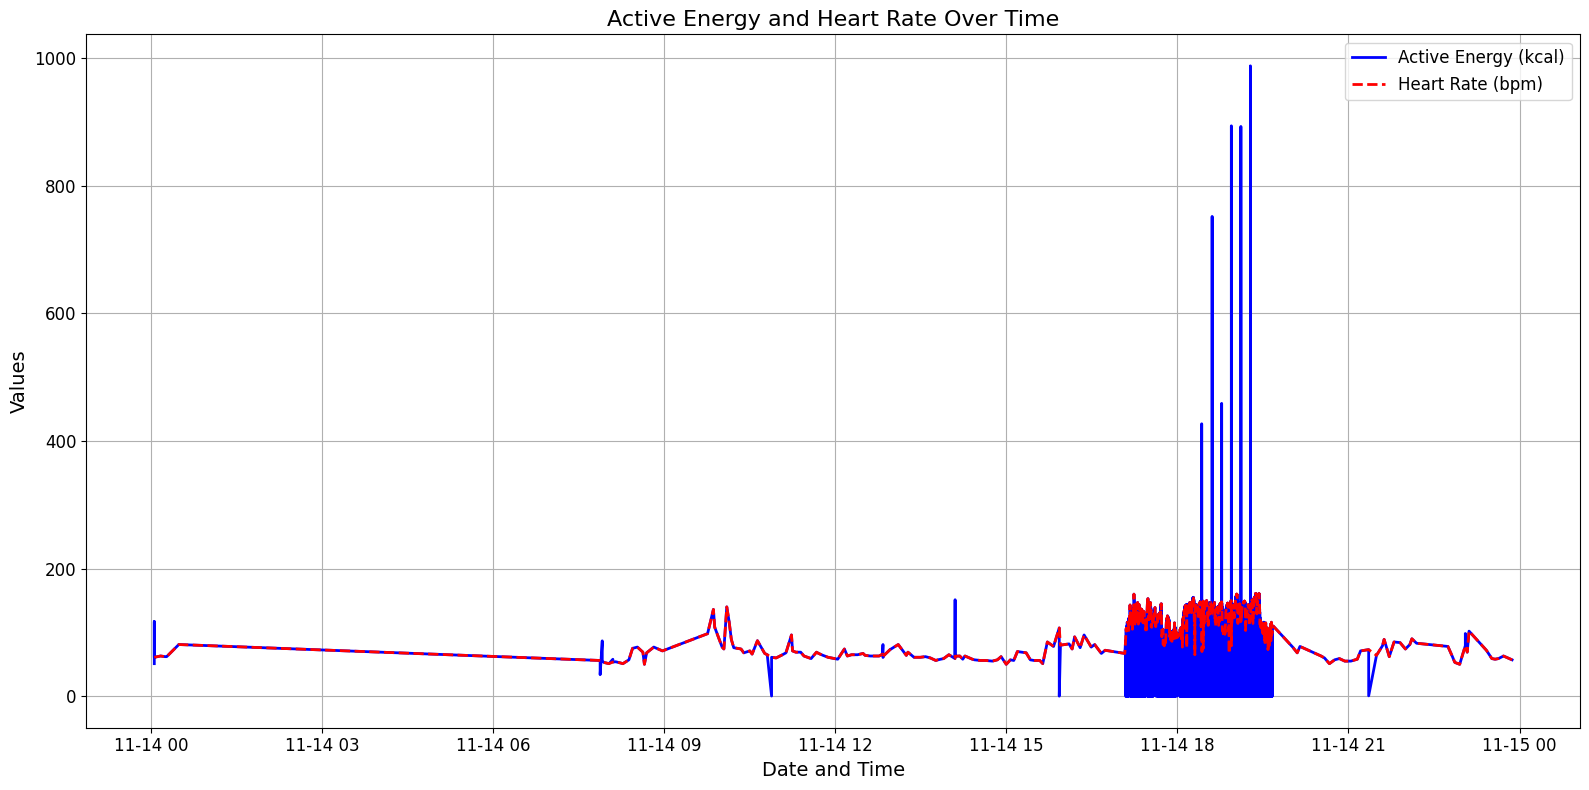

In [9]:
# Find the top 10 days with the highest energy consumption
top_energy_days = merged_df.groupby(merged_df['startDate'].dt.date)['value_energy'].sum().nlargest(1)
    
# Filter the merged DataFrame to include only data for the highest energy consumption day
filtered_df = merged_df[merged_df['startDate'].dt.date.isin(top_energy_days.index)]
print(filtered_df)
print(filtered_df['value_energy'].max())

plt.figure(figsize=(16, 8))  # Larger plot size
plt.plot(filtered_df['startDate'], filtered_df['value_energy'], label='Active Energy (kcal)', color='blue', linestyle='-', linewidth=2)
plt.plot(filtered_df['startDate'], filtered_df['value_heart_rate'], label='Heart Rate (bpm)', color='red', linestyle='--', linewidth=2)
plt.title('Active Energy and Heart Rate Over Time', fontsize=16)  # Larger title font size
plt.xlabel('Date and Time', fontsize=14)  # Larger x-axis label font size
plt.ylabel('Values', fontsize=14)  # Larger y-axis label font size
plt.legend(fontsize=12)  # Larger legend font size
plt.grid(True)
plt.xticks(fontsize=12)  # Larger x-axis tick font size
plt.yticks(fontsize=12)  # Larger y-axis tick font size
plt.tight_layout()  # Improved layout
plt.show()

In [11]:
import pandas as pd

file_path = '/Users/tanjazast/Desktop/jupyter_folder/csv/apple_export_Tanja2024-02-06.csv'


# Laden der Daten und Konvertierung des Datumsformats
df = pd.read_csv(file_path, parse_dates=['startDate'])
df['value'] = pd.to_numeric(df['value'], errors='coerce').fillna(0)

start_date = '2018-07-31 05'
end_date = '2018-08-01 20'  # Da es sich um ein 24-Stunden-Intervall handelt, können wir den nächsten Tag als Enddatum verwenden
data_31_07_2018 = df[(df['startDate'] >= start_date) & (df['startDate'] < end_date)]
heart = data_31_07_2018[data_31_07_2018['type'] == 'HeartRate']

# Anzeigen der gefilterten Daten
print(data_31_07_2018)
print(heart)


/var/folders/y1/pjhgyq7s17zfyt6wmlhs0jq40000gn/T/ipykernel_1276/16379846.py:7: DtypeWarning: Columns (0,1,2,3,5,6,7,10,11,13,14,16,17,19,20,21,25,27,28,29,30,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, parse_dates=['startDate'])


                           type             sourceName      value   unit  \
4401997               StepCount  Apple Watch von Tanja  63.000000  count   
4401998  DistanceWalkingRunning  Apple Watch von Tanja   0.046346     km   
4401999       BasalEnergyBurned  Apple Watch von Tanja  13.578000   kcal   
4402000      ActiveEnergyBurned  Apple Watch von Tanja   0.956000   kcal   
4402001  DistanceWalkingRunning  Apple Watch von Tanja   0.036629     km   
...                         ...                    ...        ...    ...   
4420906      ActiveEnergyBurned  Apple Watch von Tanja   0.825000   kcal   
4420907               StepCount  Apple Watch von Tanja   9.000000  count   
4420908  DistanceWalkingRunning  Apple Watch von Tanja   0.007700     km   
4420909      ActiveEnergyBurned  Apple Watch von Tanja   0.317000   kcal   
4420910          AppleStandHour  Apple Watch von Tanja   0.000000    NaN   

                        startDate                    endDate  \
4401997 2018-08-01 19:5

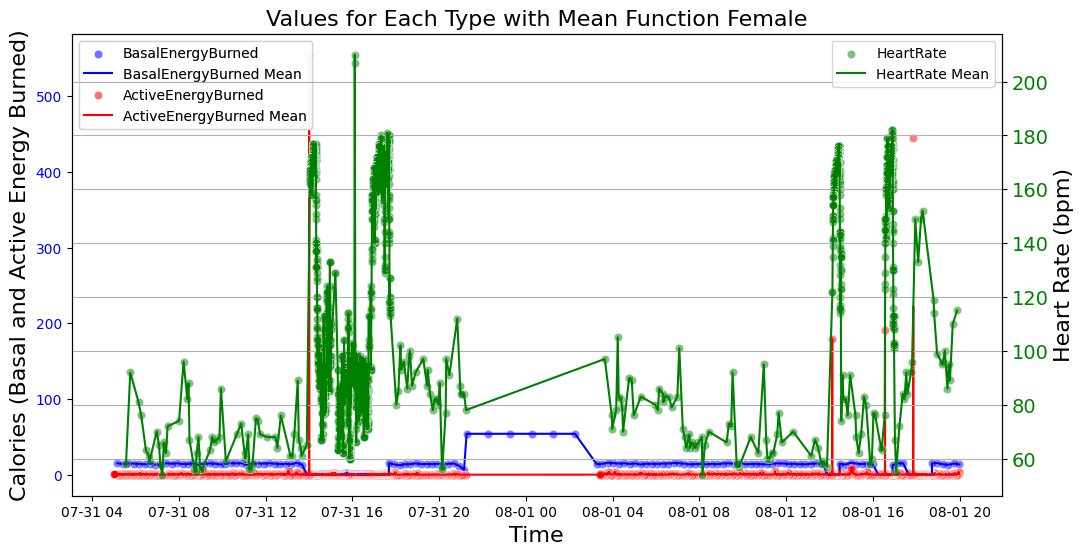

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Farben für jeden Typ definieren
colors = {'BasalEnergyBurned': 'blue', 'ActiveEnergyBurned': 'red', 'HeartRate': 'green'}

# Erstellen einer Figur für das Plotten
fig, ax1 = plt.subplots(figsize=(12, 6))

# Filtern der Daten nach Typ
data_31_07_2018 = data_31_07_2018[data_31_07_2018['value'] > 0]

# Plotten der Datenpunkte und der Mittelwertlinien für BasalEnergyBurned und ActiveEnergyBurned auf ax1
for type_name in ['BasalEnergyBurned', 'ActiveEnergyBurned']:
    type_data = data_31_07_2018[data_31_07_2018['type'] == type_name]
    
    # Scatterplot für BasalEnergyBurned und ActiveEnergyBurned
    sns.scatterplot(x=type_data['startDate'], y=type_data['value'], color=colors[type_name], label=type_name, alpha=0.5, ax=ax1)
    
    # Berechnung und Plotten der Mittelwertlinie
    mean_line = type_data.groupby('startDate')['value'].mean().reset_index()
    sns.lineplot(x=mean_line['startDate'], y=mean_line['value'], color=colors[type_name], label=f"{type_name} Mean", ax=ax1)

# Y-Achse für Kalorien
ax1.set_ylabel('Calories (Basal and Active Energy Burned)', fontsize=16)
ax1.set_xlabel('Time', fontsize=16)
ax1.tick_params(axis='y', labelcolor=colors['BasalEnergyBurned'])

# Erstellen einer zweiten Y-Achse für HeartRate
ax2 = ax1.twinx()
type_data = data_31_07_2018[data_31_07_2018['type'] == 'HeartRate']

# Scatterplot für HeartRate
sns.scatterplot(x=type_data['startDate'], y=type_data['value'], color=colors['HeartRate'], label='HeartRate', alpha=0.5, ax=ax2)

# Berechnung und Plotten der Mittelwertlinie für HeartRate
mean_line = type_data.groupby('startDate')['value'].mean().reset_index()
sns.lineplot(x=mean_line['startDate'], y=mean_line['value'], color=colors['HeartRate'], label='HeartRate Mean', ax=ax2)

# Y-Achse für Heart Rate
ax2.set_ylabel('Heart Rate (bpm)', fontsize=16)
ax2.tick_params(axis='y', labelcolor=colors['HeartRate'])

# Titel und Legende
plt.title('Values for Each Type with Mean Function Female', fontsize=16)

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
legend1 = ax1.legend(handles1, labels1, loc='upper left', fontsize=10)
legend2 = ax2.legend(handles2, labels2, loc='upper right', fontsize=10)
ax1.add_artist(legend1)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True)
plt.savefig('Values_Mean_Female.png')
plt.show()

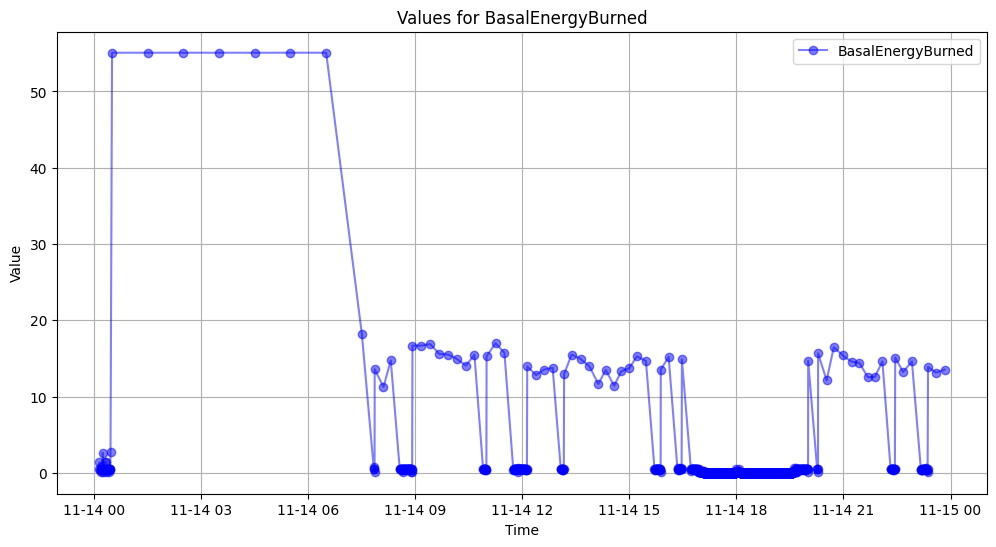

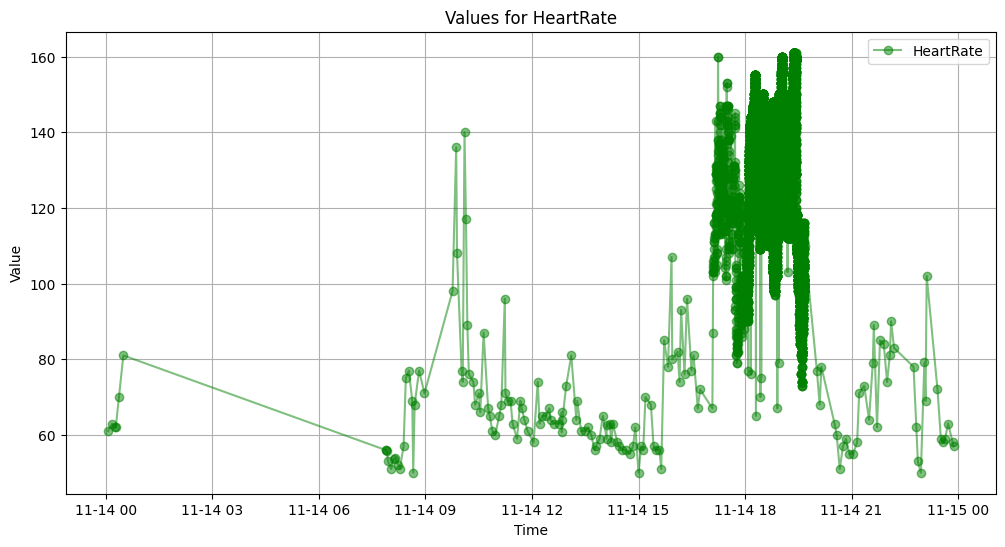

In [13]:
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# Erstellen eines Farbdiagramms für jeden Typ
colors = {'BasalEnergyBurned': 'blue', 'HeartRate': 'green'}

# Plotten der Daten für jeden Typ
for type_name, color in colors.items():
    type_data = data_31_07_2018[data_31_07_2018['type'] == type_name]
    plt.figure(figsize=(12, 6))
    plt.plot(type_data['startDate'], type_data['value'], color=color, marker='o', label=type_name, alpha=0.5)
    plt.title(f'Values for {type_name}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

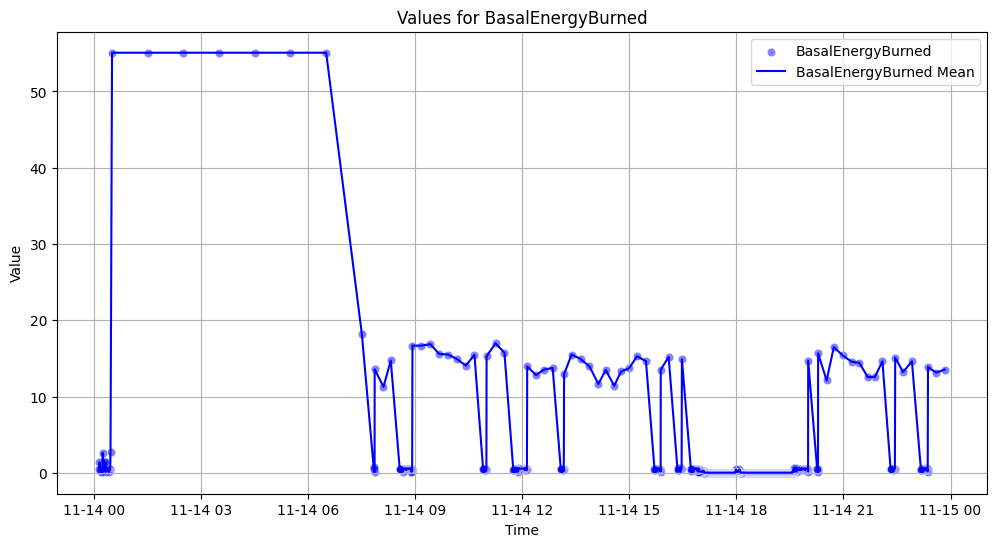

/var/folders/y1/pjhgyq7s17zfyt6wmlhs0jq40000gn/T/ipykernel_30288/2381548003.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_data['startDate'] = type_data['startDate'].dt.round('min')


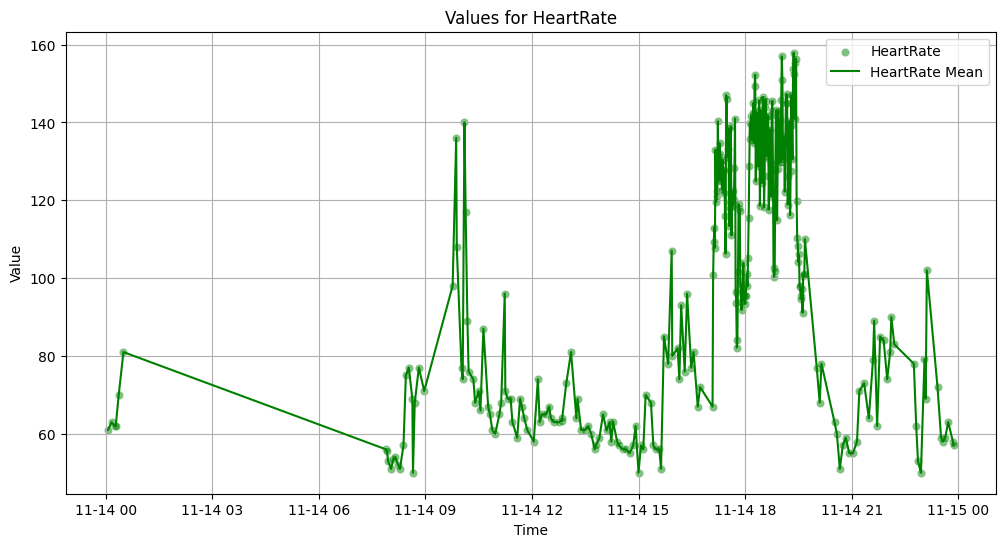

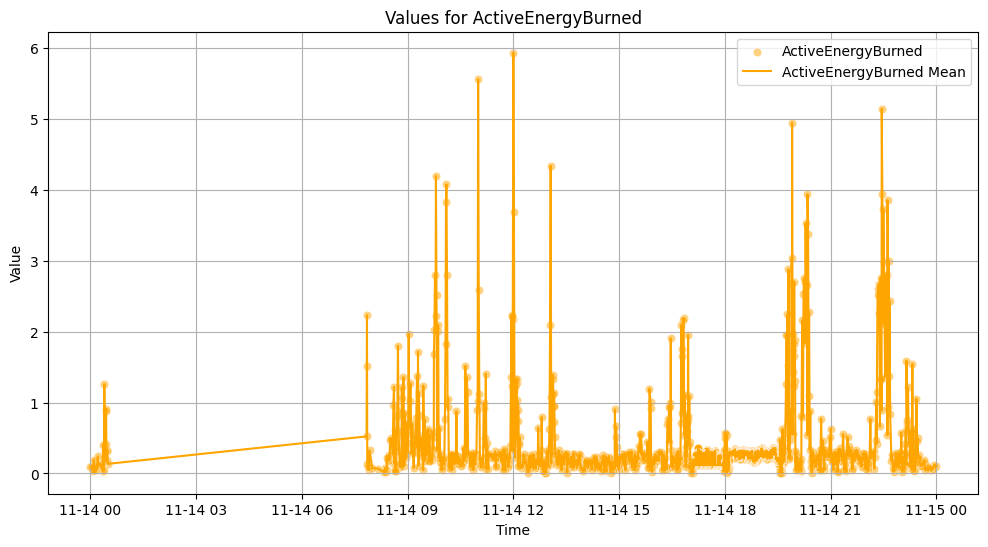

In [42]:
# Farben für jeden Typ definieren
colors = {'BasalEnergyBurned': 'blue', 'HeartRate': 'green', 'ActiveEnergyBurned': 'orange'}

# Plotten der Daten für jeden Typ
for type_name, color in colors.items():
    # Filtern der Daten nach Typ
    type_data = data_14_11_2019[data_14_11_2019['type'] == type_name]

    if type_name == 'HeartRate':
        # Runden der Zeitstempel auf Minutenbasis
        type_data['startDate'] = type_data['startDate'].dt.round('min')
        # Entfernen von Werten kleiner oder gleich Null
        type_data = type_data[type_data['value'] > 0]
        # Berechnen des Durchschnittswertes pro Minute
        type_data = type_data.groupby('startDate')['value'].mean().reset_index()

    plt.figure(figsize=(12, 6))
    
    # Plotten der Datenpunkte
    sns.scatterplot(x=type_data['startDate'], y=type_data['value'], color=color, label=type_name, alpha=0.5)
    
    # Berechnung und Plotten der Mittelwertlinie

    mean_line = type_data.groupby('startDate')['value'].mean().reset_index()
    sns.lineplot(x=mean_line['startDate'], y=mean_line['value'], color=color, label=f"{type_name} Mean")

    plt.title(f'Values for {type_name}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

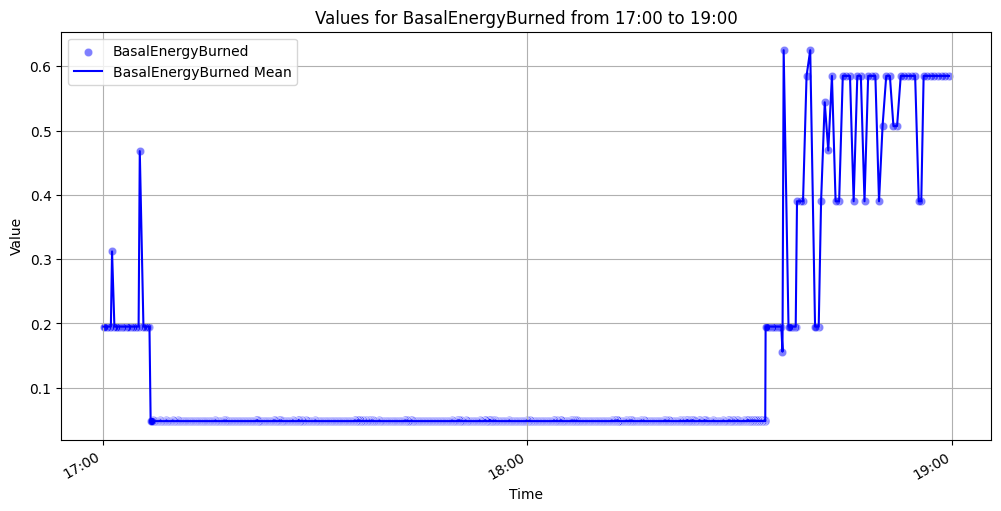

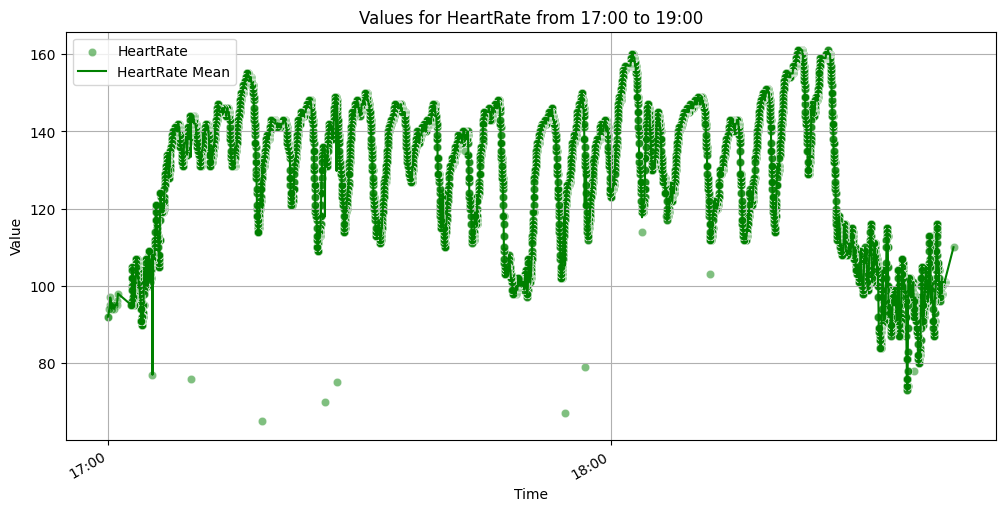

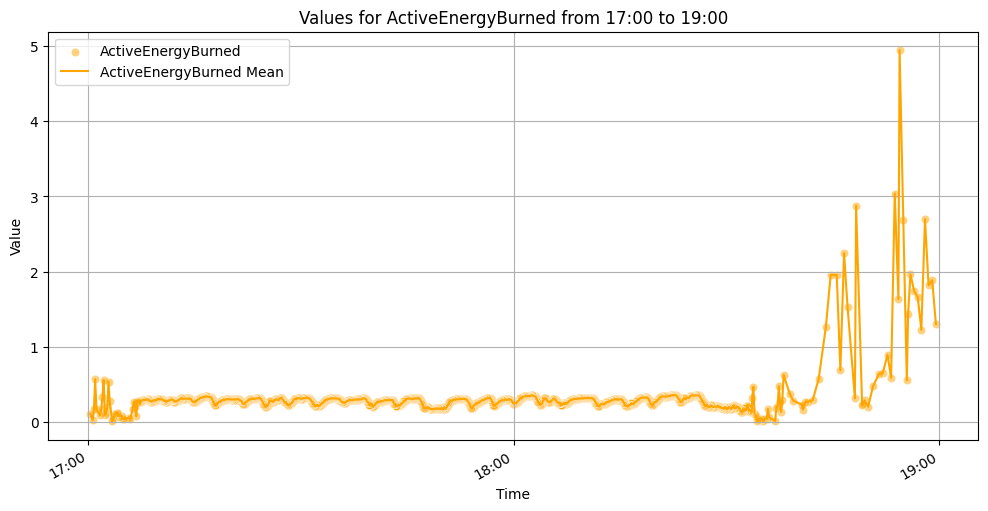

In [46]:
import matplotlib.dates as mdates

# Stellen Sie sicher, dass 'startDate' im richtigen Datetime-Format ist
df['value'] = pd.to_numeric(df['value'], errors='coerce').fillna(0)
df['startDate'] = pd.to_datetime(df['startDate'])

# Filtern der Daten nach dem angegebenen Zeitraum
data_10_10_2023 = df[(df['startDate'] >= start_date) & (df['startDate'] < end_date)]

# Farben für jeden Typ definieren
colors = {'BasalEnergyBurned': 'blue', 'HeartRate': 'green', 'ActiveEnergyBurned': 'orange'}

# Plotten der Daten für jeden Typ
for type_name, color in colors.items():
    # Filtern der Daten nach Typ und Zeitraum von 8:00 bis 09:00 Uhr
    type_data = data_14_11_2019[data_14_11_2019['type'] == type_name]
    type_data = type_data[(type_data['startDate'].dt.time >= pd.to_datetime('18:00').time()) & (type_data['startDate'].dt.time <= pd.to_datetime('20:00').time())]

    plt.figure(figsize=(12, 6))
    
    # Konvertieren der 'startDate' in matplotlib Datumseinheiten
    type_data['startDate'] = mdates.date2num(type_data['startDate'])
    
    # Plotten der Datenpunkte
    sns.scatterplot(x='startDate', y='value', data=type_data, color=color, label=type_name, alpha=0.5)
    
    # Berechnung und Plotten der Mittelwertlinie
    mean_line = type_data.groupby('startDate')['value'].mean().reset_index()
    sns.lineplot(x='startDate', y='value', data=mean_line, color=color, label=f"{type_name} Mean")

    # Formatierung der x-Achse, um Zeit darzustellen
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
    plt.gcf().autofmt_xdate()  # Neigt die Datumsangaben für eine bessere Darstellung

    plt.title(f'Values for {type_name} from 17:00 to 19:00')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

In [14]:
word_counts = data_14_11_2019['type'].value_counts()

# Ausgabe der häufigsten Wörter
print("Most common words in 'Type' column:")
print(word_counts)

Most common words in 'Type' column:
HeartRate                   18120
ActiveEnergyBurned           4241
BasalEnergyBurned            3734
DistanceWalkingRunning        669
AppleExerciseTime             330
StepCount                     200
AppleStandTime                117
AppleStandHour                 21
FlightsClimbed                 16
HeartRateVariabilitySDNN        6
WalkingHeartRateAverage         1
RestingHeartRate                1
Name: type, dtype: int64


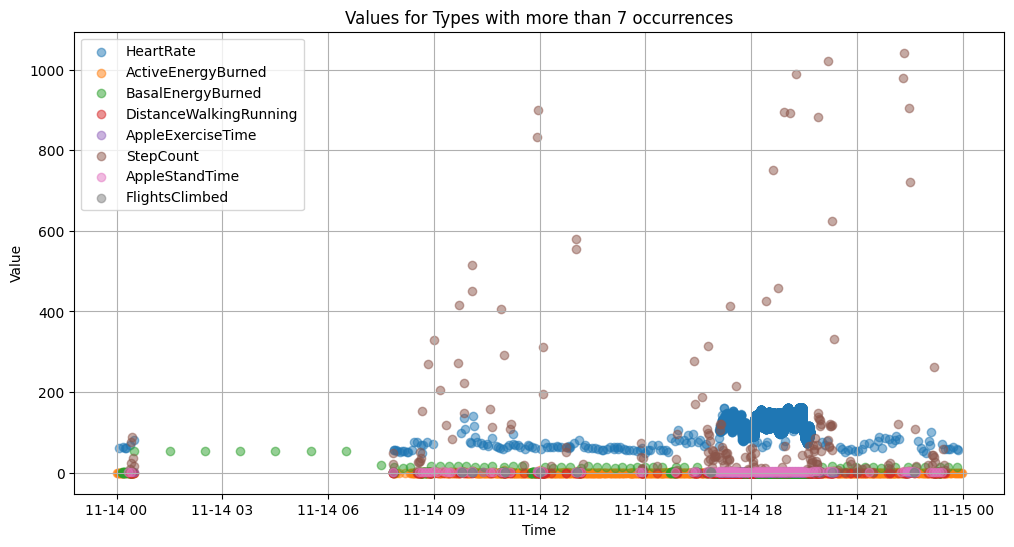

In [15]:
word_counts = data_14_11_2019['type'].value_counts()

# Filtern der Typen, die mehr als 7 Mal vorkommen
common_types = word_counts[(word_counts > 7) & (word_counts.index != 'AppleStandHour')]


# Filtern der Daten für die häufigen Typen
common_data = data_14_11_2019[data_14_11_2019['type'].isin(common_types.index)]


# Erstellen des Plots
plt.figure(figsize=(12, 6))
for type_name in common_types.index:
    type_data = common_data[common_data['type'] == type_name]
    plt.scatter(type_data['startDate'], type_data['value'], label=type_name, alpha=0.5)

plt.title('Values for Types with more than 7 occurrences')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

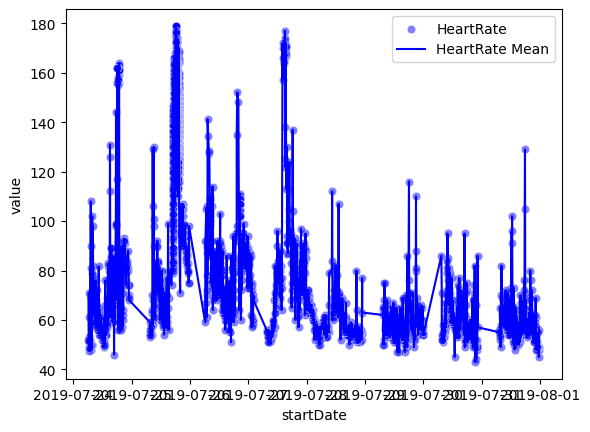

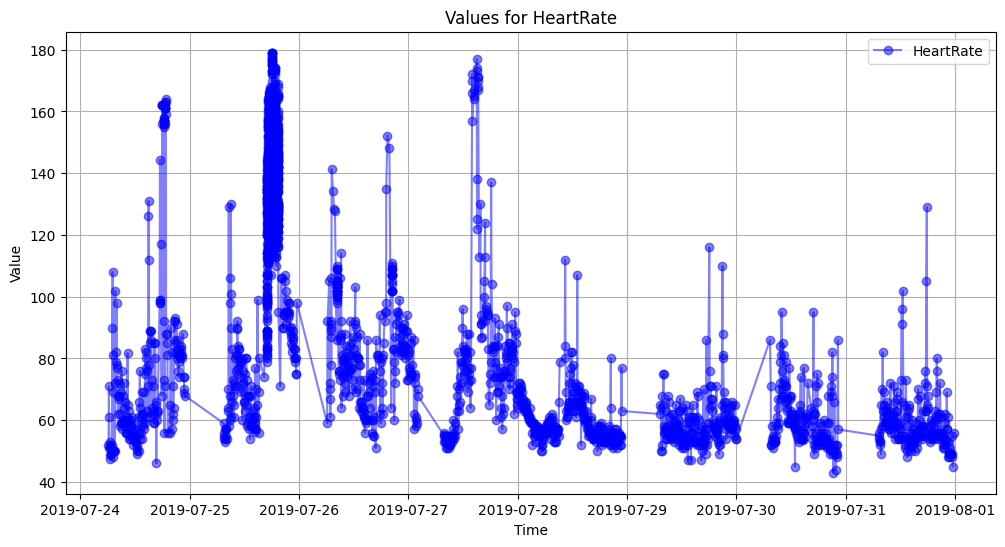

Total for HeartRate: 36.18 bph


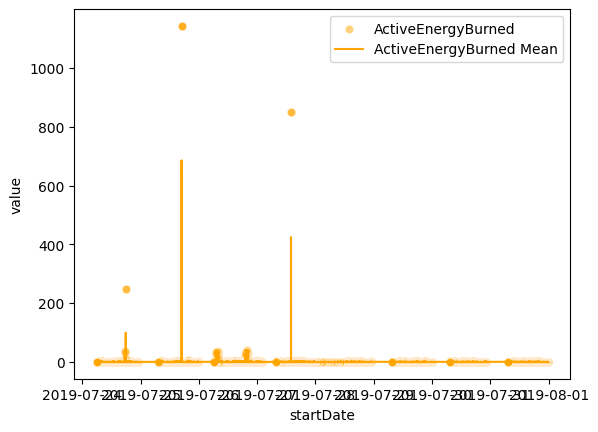

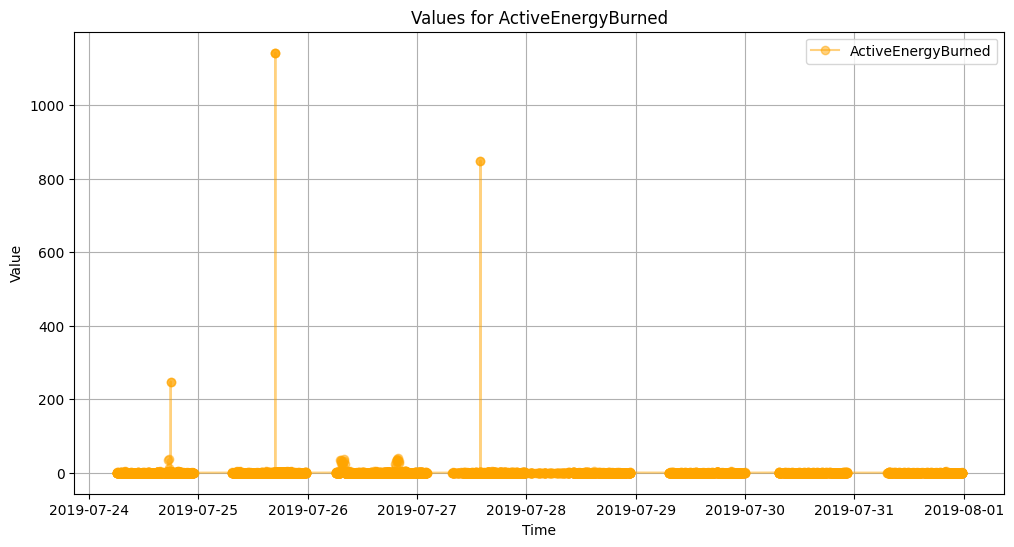

Total for ActiveEnergyBurned: 1502.86 kcal


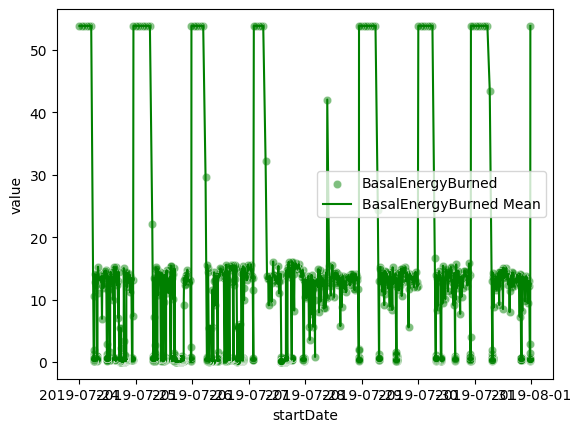

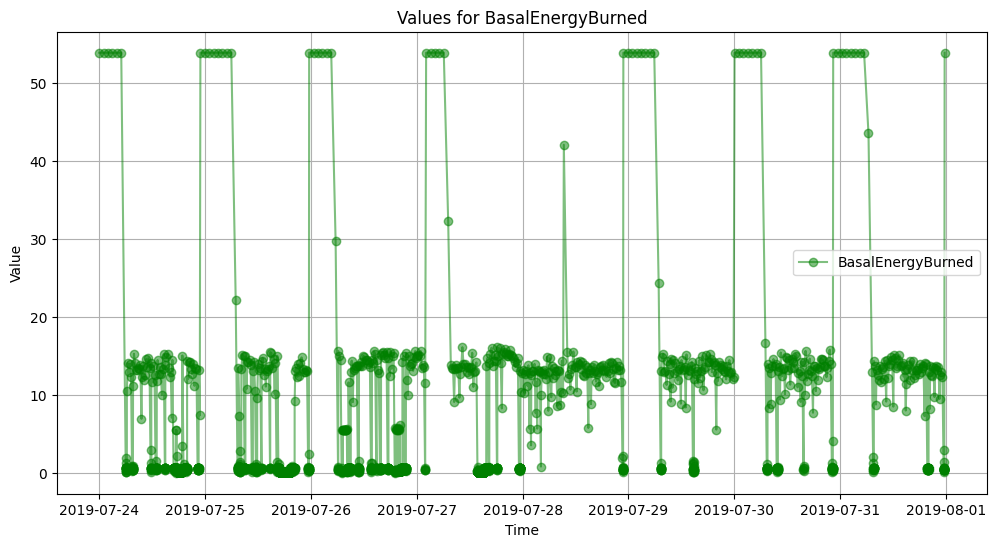

Total for BasalEnergyBurned: 1538.18 kcal


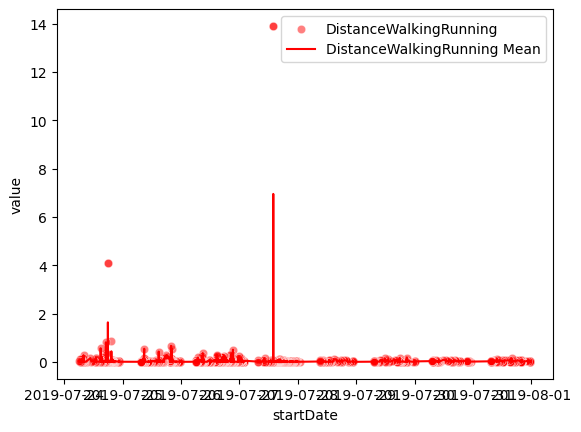

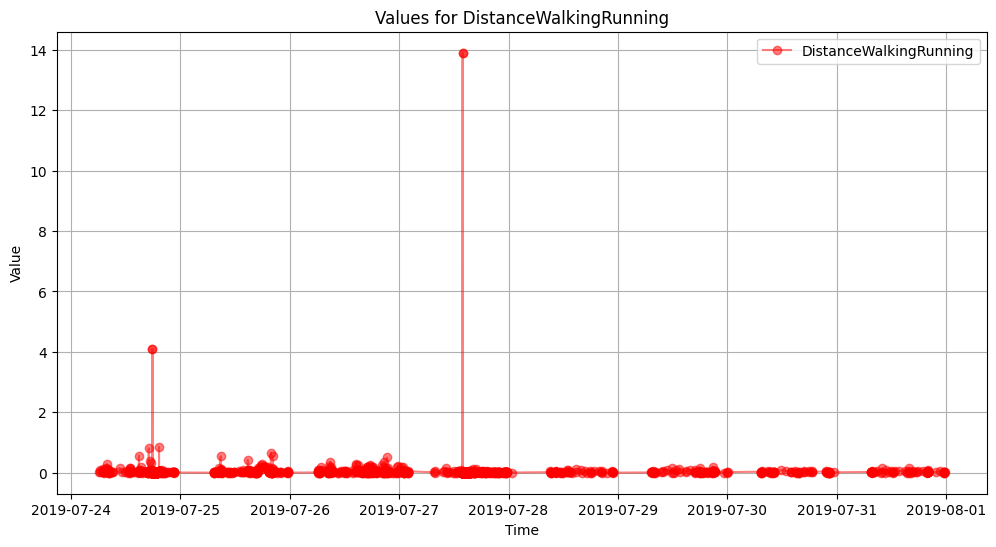

Total for DistanceWalkingRunning: 15.11 km


In [69]:
colors = {'HeartRate':'blue', 'ActiveEnergyBurned':'orange', 'BasalEnergyBurned':'green', 'DistanceWalkingRunning':'red'}
def sum_and_print_value_for_type(type_data, type_name):
    # Definieren der Umrechnungsfaktoren und Einheiten
    conversion_factors = {
        'HeartRate': (1/1440, 'bph'),  # Von beats per day zu beats per minute
        'ActiveEnergyBurned': (1, 'kcal'),  # Bereits in kcal, keine Umrechnung notwendig
        'BasalEnergyBurned': (1, 'kcal'),  # Bereits in kcal, keine Umrechnung notwendig
        'DistanceWalkingRunning': (1, 'km'),  # Von Meter zu Kilometer
        'AppleExerciseTime': (1/60, 'hours'),  # Von Minuten zu Stunden
        'StepCount': (1, 'steps'),  # Keine Umrechnung, bereits in Schritten
        'AppleStandTime': (1/60, 'hours')  # Von Minuten zu Stunden
    }
    
    # Aufsummieren der Werte für den aktuellen Typ
    total_value = type_data['value'].sum()
    
    # Umrechnung der Gesamtsumme und Bestimmung der Einheit
    if type_name in conversion_factors:
        factor, unit = conversion_factors[type_name]
        converted_total = total_value * factor
    else:
        converted_total = total_value  # Keine Umrechnung, falls Typ nicht bekannt
        unit = 'units'  # Standard-Einheit, wenn Typ nicht erkannt wird

    # Ausgabe der aufsummierten Werte und der Einheit
    print(f'Total for {type_name}: {converted_total:.2f} {unit}')

# Erstellen eines Plots für jeden Typ und Aufruf der angepassten Funktion
for type_name, color in colors.items():
    type_data = common_data[common_data['type'] == type_name]
    sns.scatterplot(x=type_data['startDate'], y=type_data['value'], color=color, label=type_name, alpha=0.5)
    mean_line = type_data.groupby('startDate')['value'].mean().reset_index()
    sns.lineplot(x=mean_line['startDate'], y=mean_line['value'], color=color, label=f"{type_name} Mean")
    plt.figure(figsize=(12, 6))
    plt.plot(type_data['startDate'], type_data['value'], color=color, marker='o', label=type_name, alpha=0.5)
    plt.title(f'Values for {type_name}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Farbe für den nächsten Plot aktualisieren
    #color_index = (color_index + 1) % len(colors)
    
    # Aufrufen der angepassten Funktion, um den Wert und die Einheit für den aktuellen Typ auszudrucken
    sum_and_print_value_for_type(type_data, type_name)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Dateipfad zur CSV-Datei
file_path = 'apple_export_Tanja2024-02-06.csv'

# Laden der Daten
df = pd.read_csv(file_path)

# Filtern der relevanten Spalten und Entfernen von NaN-Werten
df = df[['type', 'value']].dropna()

# Entfernen von Zeilen mit 'AppleStandHour' und nicht numerischen Werten in der 'value'-Spalte
df = df[(df['type'] != 'AppleStandHour') & pd.to_numeric(df['value'], errors='coerce').notna()]

# Kategorisieren der Aktivitäten basierend auf dem Typ
df['activity'] = df['type'].astype('category').cat.codes

# Aufteilen der Daten in Trainings- und Testsets
X = df[['value']]
y = df['activity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisieren und Trainieren des Entscheidungsbaumklassifikators
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Vorhersagen auf dem Testset
y_pred = clf.predict(X_test)

# Auswertung der Genauigkeit des Modells
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/var/folders/y1/pjhgyq7s17zfyt6wmlhs0jq40000gn/T/ipykernel_30288/3732283822.py:9: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,13,14,16,17,19,20,21,25,27,28,29,30,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Accuracy: 0.9168748008076366


In [87]:
start_date = '2019-07-24'
end_date = '2019-08-01'  # Da es sich um ein 24-Stunden-Intervall handelt, können wir den nächsten Tag als Enddatum verwenden
data_week_2019 = df[(df['startDate'] >= start_date) & (df['startDate'] < end_date)]
print(data_week_2019)

                       type             sourceName   value       unit  \
1944660   BasalEnergyBurned  Apple Watch von Tanja  53.866       kcal   
1944661           HeartRate  Apple Watch von Tanja  56.000  count/min   
1944662  ActiveEnergyBurned  Apple Watch von Tanja   0.366       kcal   
1944663  ActiveEnergyBurned  Apple Watch von Tanja   0.060       kcal   
1944664           StepCount  Apple Watch von Tanja  30.000      count   
...                     ...                    ...     ...        ...   
1976584   BasalEnergyBurned  Apple Watch von Tanja  53.866       kcal   
1976585   BasalEnergyBurned  Apple Watch von Tanja  53.866       kcal   
1976586   BasalEnergyBurned  Apple Watch von Tanja  53.866       kcal   
1976587   BasalEnergyBurned  Apple Watch von Tanja  53.866       kcal   
1976588   BasalEnergyBurned  Apple Watch von Tanja  53.866       kcal   

                        startDate                    endDate  \
1944660 2019-07-31 23:39:24+01:00  2019-08-01 00:39:24 +010

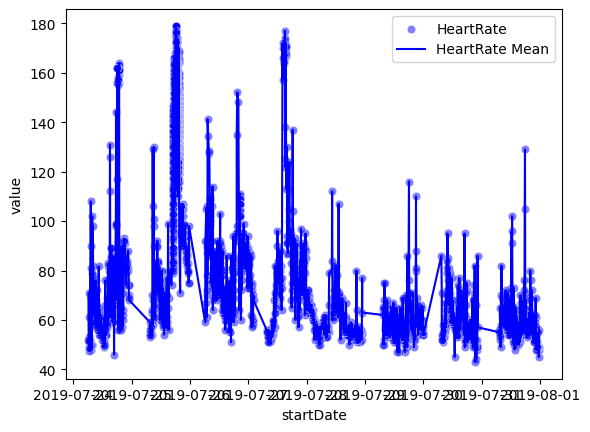

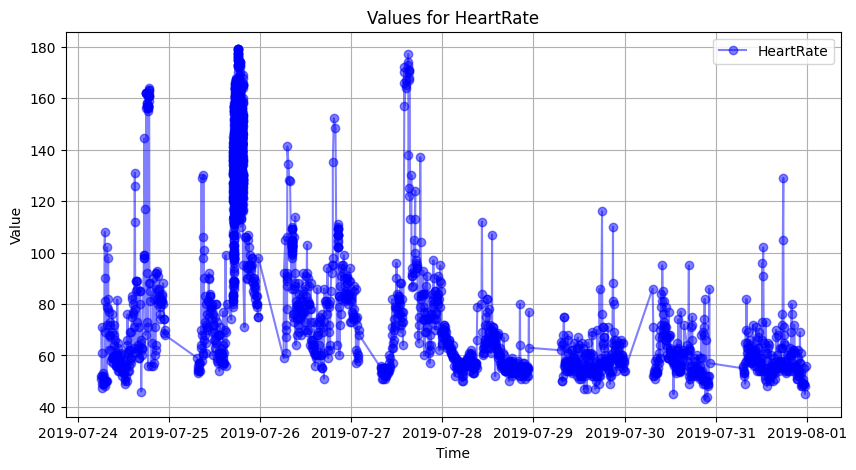

Total average per day (one week in October 2019) HeartRate: 36.18 bpm


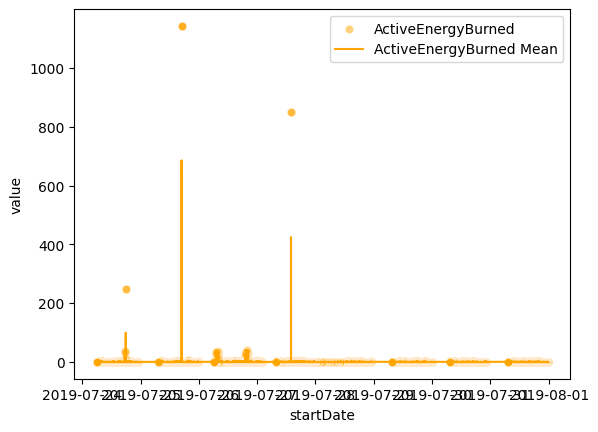

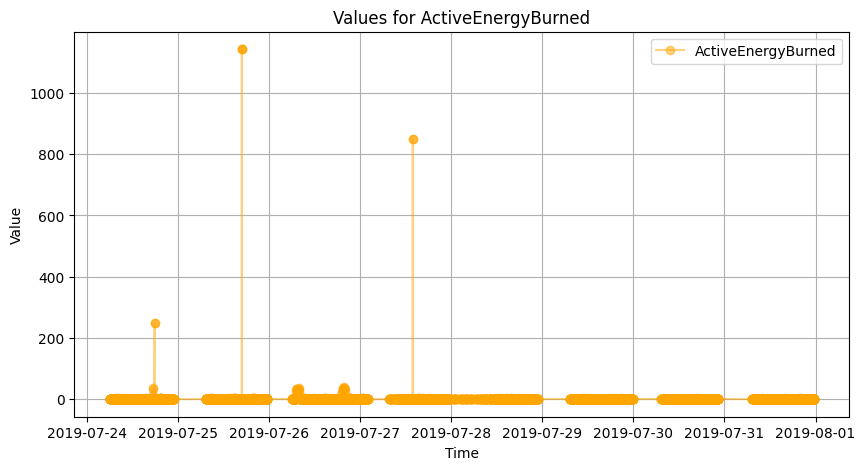

Total average per day (one week in October 2019) ActiveEnergyBurned: 1502.86 kcal


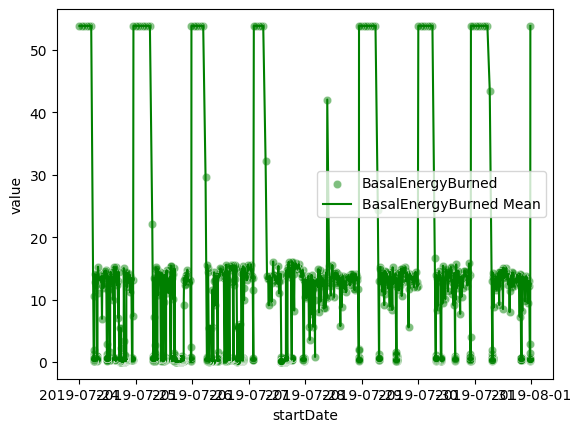

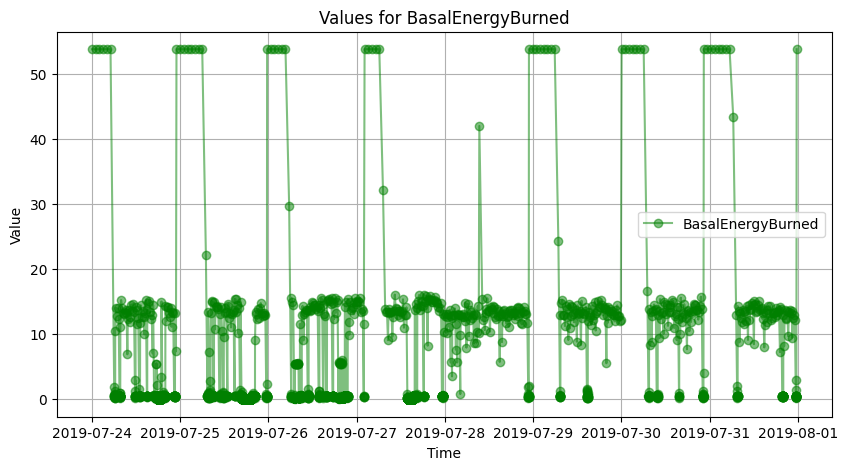

Total average per day (one week in October 2019) BasalEnergyBurned: 1538.18 kcal


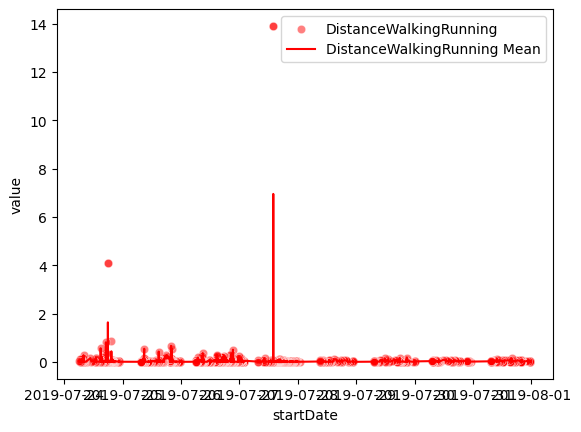

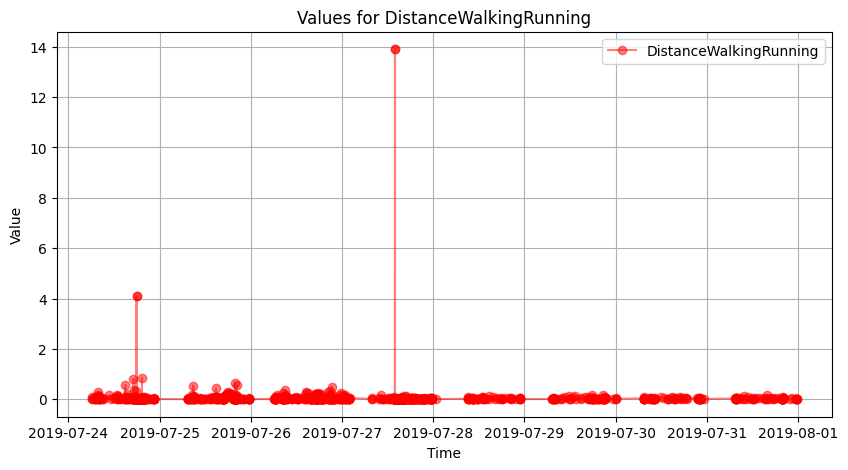

Total average per day (one week in October 2019) DistanceWalkingRunning: 15.11 km


In [91]:
word_counts = data_week_2019['type'].value_counts()

# Filtern der Typen, die mehr als 7 Mal vorkommen
common_types = word_counts[(word_counts > 7) & (word_counts.index != 'AppleStandHour')]


# Filtern der Daten für die häufigen Typen
common_data = data_week_2019[data_week_2019['type'].isin(common_types.index)]

colors = {'HeartRate':'blue', 'ActiveEnergyBurned':'orange', 'BasalEnergyBurned':'red', 'DistanceWalkingRunning':'green'}
def sum_and_print_value_for_type(type_data, type_name):
    # Definieren der Umrechnungsfaktoren und Einheiten
    conversion_factors = {
        'HeartRate': (1/1440/7, 'bpm'),  # Von beats per day zu beats per minute
        'ActiveEnergyBurned': (1/7, 'kcal'),  # Bereits in kcal, keine Umrechnung notwendig
        'BasalEnergyBurned': (1/7, 'kcal'),  # Bereits in kcal, keine Umrechnung notwendig
        'DistanceWalkingRunning': (1/7, 'km'),  # Von Meter zu Kilometer
        'AppleExerciseTime': (1/60/7, 'hours'),  # Von Minuten zu Stunden
        'StepCount': (1/7, 'steps'),  # Keine Umrechnung, bereits in Schritten
        'AppleStandTime': (1/60/7, 'hours')  # Von Minuten zu Stunden
    }
    
    # Aufsummieren der Werte für den aktuellen Typ
    total_value = type_data['value'].sum()
    
    # Umrechnung der Gesamtsumme und Bestimmung der Einheit
    if type_name in conversion_factors:
        factor, unit = conversion_factors[type_name]
        converted_total = total_value * factor
    else:
        converted_total = total_value  # Keine Umrechnung, falls Typ nicht bekannt
        unit = 'units'  # Standard-Einheit, wenn Typ nicht erkannt wird

    # Ausgabe der aufsummierten Werte und der Einheit
    print(f'Total average per day (one week in October 2019) {type_name}: {converted_total:.2f} {unit}')

# Erstellen eines Plots für jeden Typ und Aufruf der angepassten Funktion
for type_name, color in colors.items():
    type_data = common_data[common_data['type'] == type_name]
    sns.scatterplot(x=type_data['startDate'], y=type_data['value'], color=color, label=type_name, alpha=0.5)
    mean_line = type_data.groupby('startDate')['value'].mean().reset_index()
    sns.lineplot(x=mean_line['startDate'], y=mean_line['value'], color=color, label=f"{type_name} Mean")
    plt.figure(figsize=(10, 5))
    plt.plot(type_data['startDate'], type_data['value'], color=color, marker='o', label=type_name, alpha=0.5)
    plt.title(f'Values for {type_name}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Farbe für den nächsten Plot aktualisieren
    #color_index = (color_index + 1) % len(colors)
    
    # Aufrufen der angepassten Funktion, um den Wert und die Einheit für den aktuellen Typ auszudrucken
    sum_and_print_value_for_type(type_data, type_name)

In [90]:
from sklearn.ensemble import RandomForestClassifier

df['activity'] = pd.to_numeric(df['value']) > df['value'].astype(float).mean()

# Aufteilen der Daten in Trainings- und Testsets
X = df[['value']]
y = df['activity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisieren und Trainieren des Random Forest-Klassifikators
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Vorhersagen auf dem Testset
y_pred = clf.predict(X_test)

# Auswertung der Genauigkeit des Modells
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [19]:
df = df[['type', 'value']].dropna()

# Entfernen von Zeilen mit 'AppleStandHour' und nicht numerischen Werten in der 'value'-Spalte
df = df[(df['type'] != 'AppleStandHour') & pd.to_numeric(df['value'], errors='coerce').notna()]

# Kategorisieren der Herzfrequenz basierend auf dem Wert von 'value'
# Hier verwenden wir eine einfache Kategorisierung, z.B. niedrig (<= 60), normal (60-100) und hoch (> 100)
df['heart_rate_category'] = pd.cut(pd.to_numeric(df['value']), bins=[-float('inf'), 60, 100, float('inf')],
                                   labels=['low', 'normal', 'high'])

# Aufteilen der Daten in Trainings- und Testsets
X = df[['value']]
y = df['heart_rate_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisieren und Trainieren des Random Forest-Klassifikators
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Vorhersagen auf dem Testset
y_pred = clf.predict(X_test)

# Auswertung der Genauigkeit des Modells
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


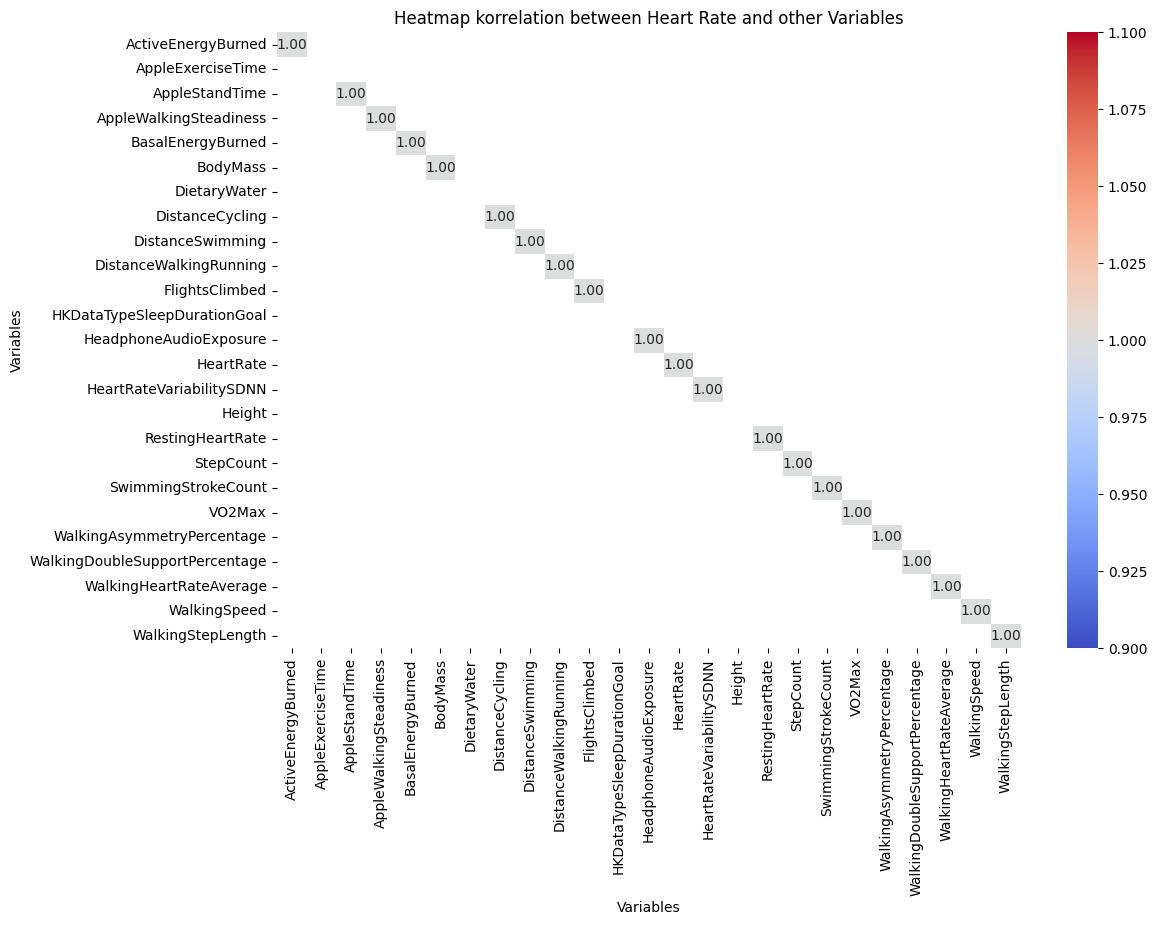

In [20]:
# Kategorisieren der Herzfrequenz basierend auf dem Wert von 'value'
df['heart_rate'] = pd.to_numeric(df['value'])

# Filtern auf relevante Variablen für die Korrelation
relevant_columns = ['type', 'value']  # Anpassen der relevanten Spalten nach Bedarf

# Pivot-Tabelle erstellen
pivot_table = df.pivot_table(index=df.index, columns='type', values='value')

# Korrelationsmatrix berechnen
correlation_matrix = pivot_table.corr()

# Heatmap der Korrelationen erstellen
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap korrelation between Heart Rate and other Variables')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

In [72]:
file_path = 'apple_export_Tanja2024-02-06.csv'


# Laden der Daten und Konvertierung des Datumsformats
df = pd.read_csv(file_path, parse_dates=['startDate'])
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# Drop rows with NaN values in 'value' column to ensure equal length of data
df = df.dropna(subset=['value'])

# Konvertiere die 'startDate' und 'endDate' in Datetime-Objekte
df['startDate'] = pd.to_datetime(df['startDate'], errors='coerce', utc=True)
df['endDate'] = pd.to_datetime(df['endDate'], errors='coerce', utc=True)

start_date = '2018-07-31 09:43:30+00:00'
end_date = '2018-07-31 09:49:30+00:00' 

data_6MW = df[(df['startDate'] >= start_date) & (df['startDate'] < end_date)]
#heart = data_6MW[data_6MW['type'] == 'HeartRate']

# Anzeigen der gefilterten Daten
print(data_6MW)
#print(heart)

/var/folders/y1/pjhgyq7s17zfyt6wmlhs0jq40000gn/T/ipykernel_84402/704997861.py:5: DtypeWarning: Columns (0,1,2,3,5,6,7,10,11,13,14,16,17,19,20,21,25,27,28,29,30,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, parse_dates=['startDate'])


                           type             sourceName     value   unit  \
4420040      ActiveEnergyBurned  Apple Watch von Tanja   0.55500   kcal   
4420041  DistanceWalkingRunning  Apple Watch von Tanja   0.02572     km   
4420042               StepCount  Apple Watch von Tanja  30.00000  count   
4420043      ActiveEnergyBurned  Apple Watch von Tanja   1.89400   kcal   
4420044               StepCount  Apple Watch von Tanja  27.00000  count   
4420045  DistanceWalkingRunning  Apple Watch von Tanja   0.02254     km   
4420046      ActiveEnergyBurned  Apple Watch von Tanja   0.50800   kcal   
4420047      ActiveEnergyBurned  Apple Watch von Tanja   0.81800   kcal   
4420048               StepCount  Apple Watch von Tanja  18.00000  count   
4420049  DistanceWalkingRunning  Apple Watch von Tanja   0.01537     km   
4420050      ActiveEnergyBurned  Apple Watch von Tanja   0.36600   kcal   
4420051  DistanceWalkingRunning  Apple Watch von Tanja   0.01392     km   
4420052               Ste

In [78]:
file_path = 'apple_export_Michi2024-02-07.csv'


# Laden der Daten und Konvertierung des Datumsformats
df = pd.read_csv(file_path, parse_dates=['startDate'])
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# Drop rows with NaN values in 'value' column to ensure equal length of data
df = df.dropna(subset=['value'])

# Konvertiere die 'startDate' und 'endDate' in Datetime-Objekte
df['startDate'] = pd.to_datetime(df['startDate'], errors='coerce', utc=True)
df['endDate'] = pd.to_datetime(df['endDate'], errors='coerce', utc=True)

start_date = '2023-05-10 09:27:36+00:00'
end_date = '2023-05-10 09:33:36+00:00' 

data_6MW = df[(df['startDate'] >= start_date) & (df['startDate'] < end_date)]
#heart = data_6MW[data_6MW['type'] == 'HeartRate']

# Anzeigen der gefilterten Daten
print(data_6MW)
#print(heart)

/var/folders/y1/pjhgyq7s17zfyt6wmlhs0jq40000gn/T/ipykernel_84402/2391257941.py:5: DtypeWarning: Columns (0,1,2,3,5,6,7,10,11,14,15,17,18,20,21,22,25,27,30,31,32,33,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, parse_dates=['startDate'])


                       type             sourceName   value       unit  \
1046269  ActiveEnergyBurned  Michael’s Apple Watch   0.352       kcal   
1046270           HeartRate  Michael’s Apple Watch  64.000  count/min   
1046271  ActiveEnergyBurned  Michael’s Apple Watch   0.132       kcal   
1046272  ActiveEnergyBurned  Michael’s Apple Watch   0.107       kcal   
1046273  ActiveEnergyBurned  Michael’s Apple Watch   0.127       kcal   
1046274  ActiveEnergyBurned  Michael’s Apple Watch   0.235       kcal   

                        startDate                   endDate  \
1046269 2023-05-10 09:33:11+00:00 2023-05-10 09:34:03+00:00   
1046270 2023-05-10 09:32:15+00:00 2023-05-10 09:32:15+00:00   
1046271 2023-05-10 09:30:57+00:00 2023-05-10 09:31:38+00:00   
1046272 2023-05-10 09:29:45+00:00 2023-05-10 09:30:06+00:00   
1046273 2023-05-10 09:28:53+00:00 2023-05-10 09:29:14+00:00   
1046274 2023-05-10 09:27:52+00:00 2023-05-10 09:28:43+00:00   

                      creationDate path  durat

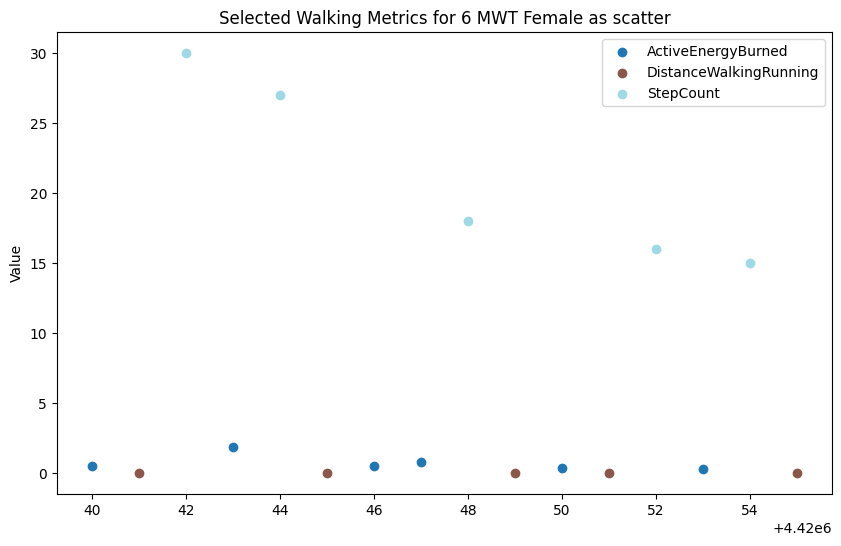

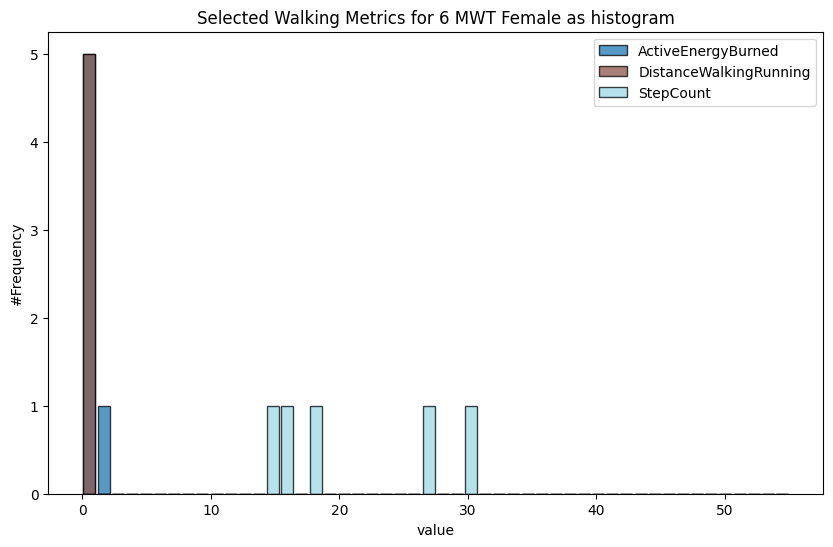

In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

types = data_6MW['type'].unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(types)))
type_to_color = dict(zip(types, colors))

# Plotting
plt.figure(figsize=(10, 6))

for _type in types:
    # Filtern der Daten für jeden Typ
    subset = data_6MW[data_6MW['type'] == _type]
    
    # Erzeugen eines Scatter-Plots für jeden Typ
    plt.scatter(subset.index, subset['value'], label=_type, color=type_to_color[_type])

plt.ylabel('Value')
plt.title('Selected Walking Metrics for 6 MWT Female as scatter')
plt.legend()
plt.savefig('Scatter_6MW_female.png')

plt.show()

# Plotting
plt.figure(figsize=(10, 6))

for _type in types:
    # Filtern der Daten für jeden Typ
    subset = data_6MW[data_6MW['type'] == _type]
    
    # Erzeugen eines Scatter-Plots für jeden Typ
    plt.hist(subset['value'], bins=50, range=(0, 55), label=_type, alpha=0.75, color=type_to_color[_type], edgecolor='black', rwidth=0.85)

plt.xlabel('value')
plt.ylabel('#Frequency')
plt.title('Selected Walking Metrics for 6 MWT Female as histogram')
plt.legend()
plt.savefig('Dist_HeartRate_6MW_female.png')
plt.show()

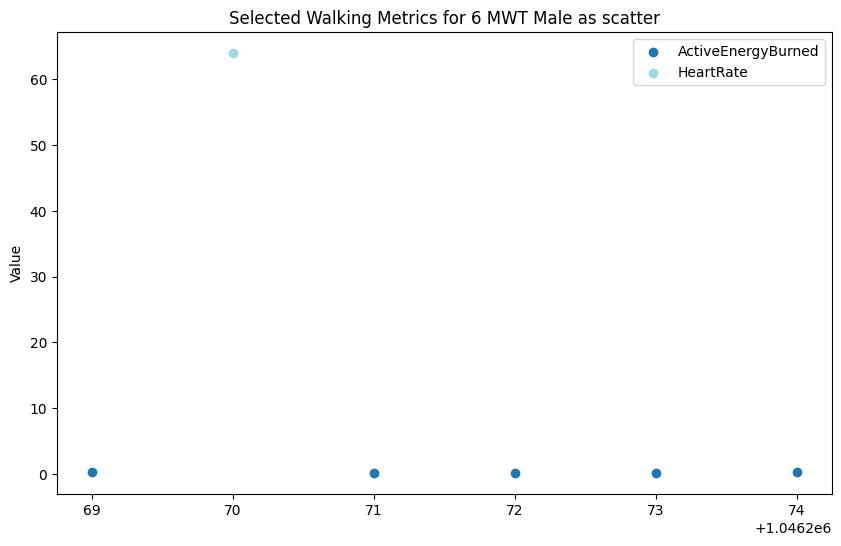

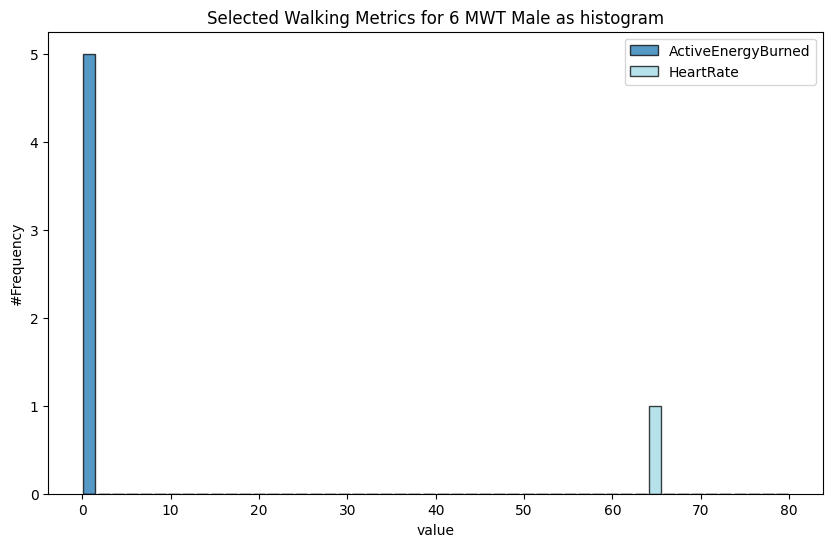

In [79]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

types = data_6MW['type'].unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(types)))
type_to_color = dict(zip(types, colors))

# Plotting
plt.figure(figsize=(10, 6))

for _type in types:
    # Filtern der Daten für jeden Typ
    subset = data_6MW[data_6MW['type'] == _type]
    
    # Erzeugen eines Scatter-Plots für jeden Typ
    plt.scatter(subset.index, subset['value'], label=_type, color=type_to_color[_type])

plt.ylabel('Value')
plt.title('Selected Walking Metrics for 6 MWT Male as scatter')
plt.legend()
plt.savefig('Scatter_6MW_male.png')
plt.show()

plt.figure(figsize=(10, 6))

for _type in types:
    # Filtern der Daten für jeden Typ
    subset = data_6MW[data_6MW['type'] == _type]
    
    # Erzeugen eines Scatter-Plots für jeden Typ
    plt.hist(subset['value'], bins=50, range=(0, 80), label=_type, alpha=0.75, color=type_to_color[_type], edgecolor='black', rwidth=0.85)

plt.xlabel('value')
plt.ylabel('#Frequency')
plt.title('Selected Walking Metrics for 6 MWT Male as histogram')
plt.legend()
plt.savefig('Dist_HeartRate_6MW_male.png')
plt.show()